<a href="https://colab.research.google.com/github/jaiswalgaurav012002/ML-R-D-task1/blob/main/AI_ML_research_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
wine_dataset = pd.read_csv('winequality-red.csv')

In [ ]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [ ]:
# first 5 rows of the dataset
wine_dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# statistical measures of the dataset
wine_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<Axes: xlabel='quality', ylabel='volatile acidity'>

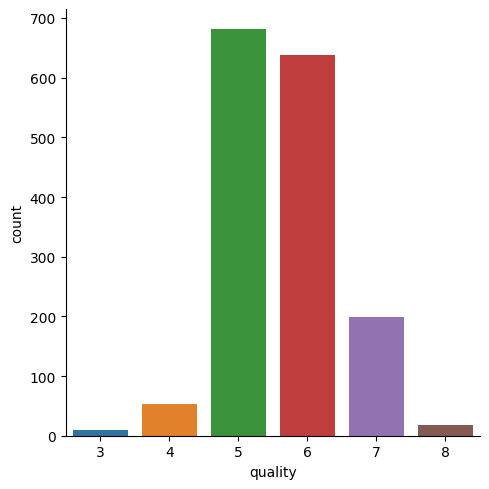

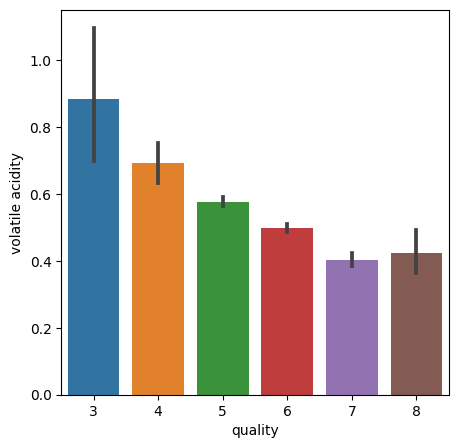

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

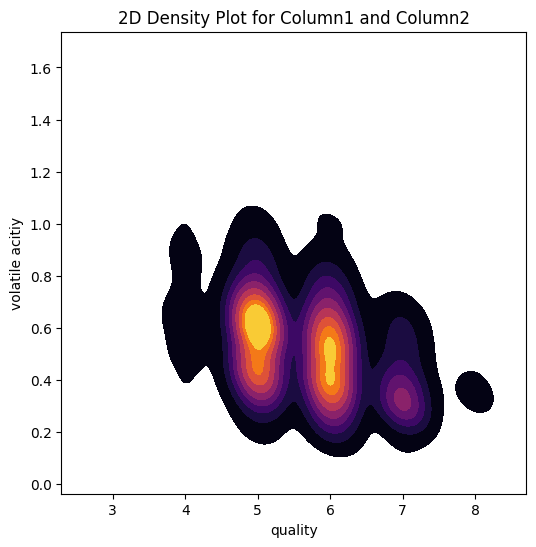

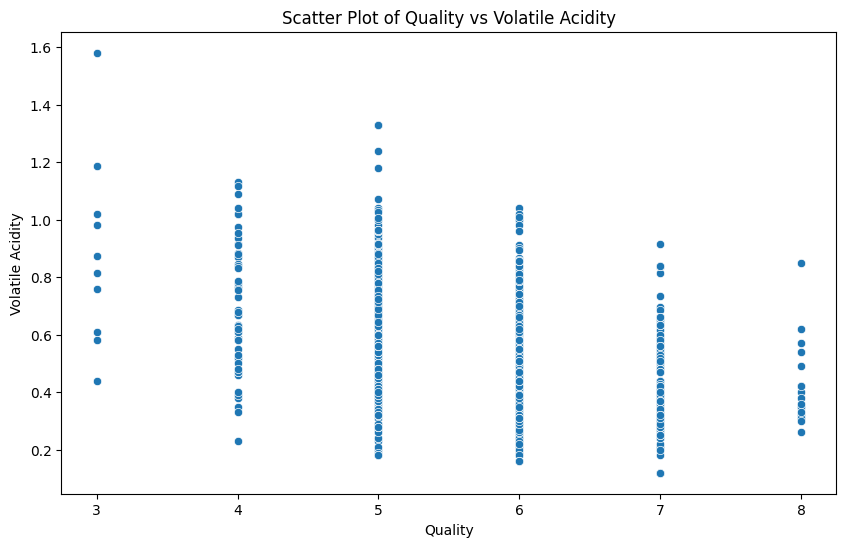

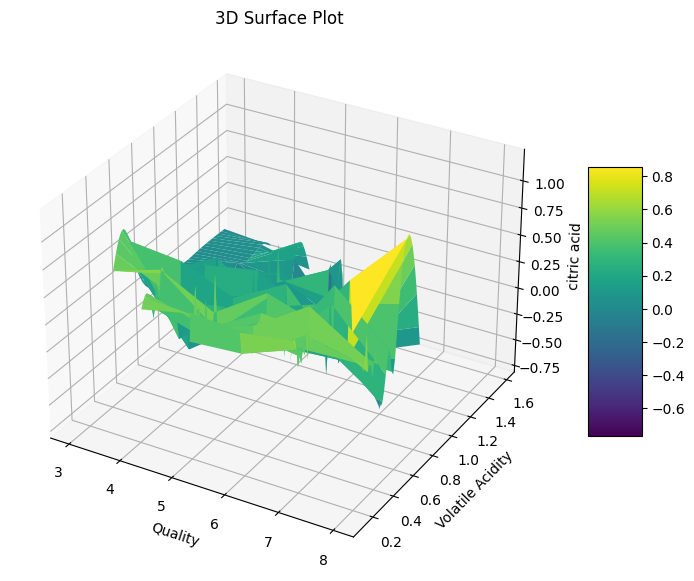

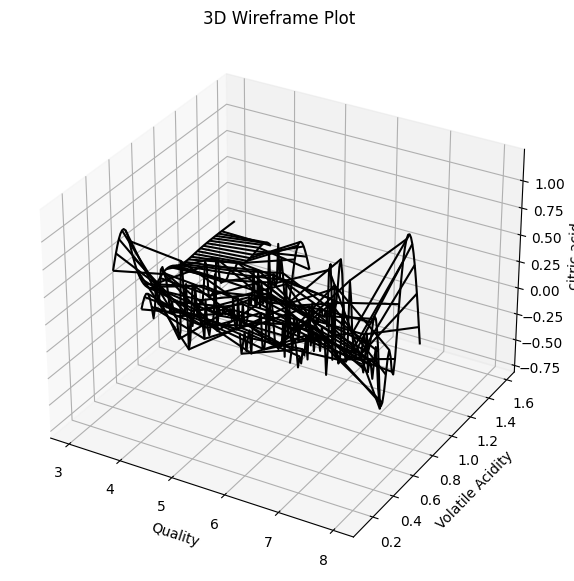

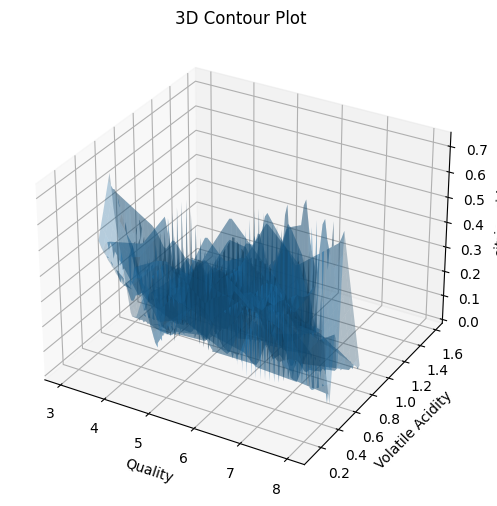

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Column1', 'Column2' are the columns you selected
plt.figure(figsize=(6, 6))
sns.kdeplot(data=wine_dataset, x="quality", y="volatile acidity", cmap="inferno", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('quality')
plt.ylabel('volatile acitiy')
plt.show()

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality', y='volatile acidity', data=wine_dataset)

# Adding title and labels
plt.title('Scatter Plot of Quality vs Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')

# Displaying the plot
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['citric acid']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('citric acid')
ax.set_title('3D Contour Plot')

plt.show()

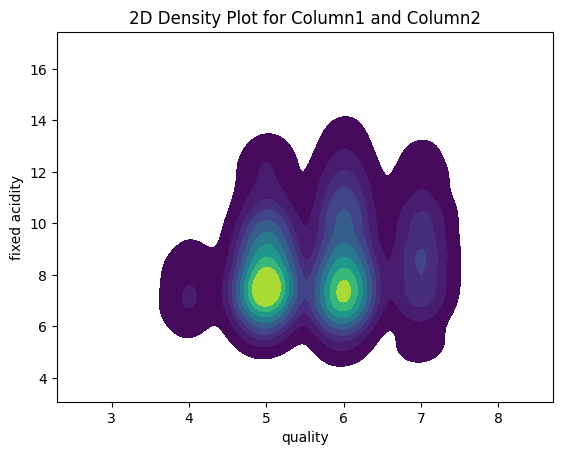

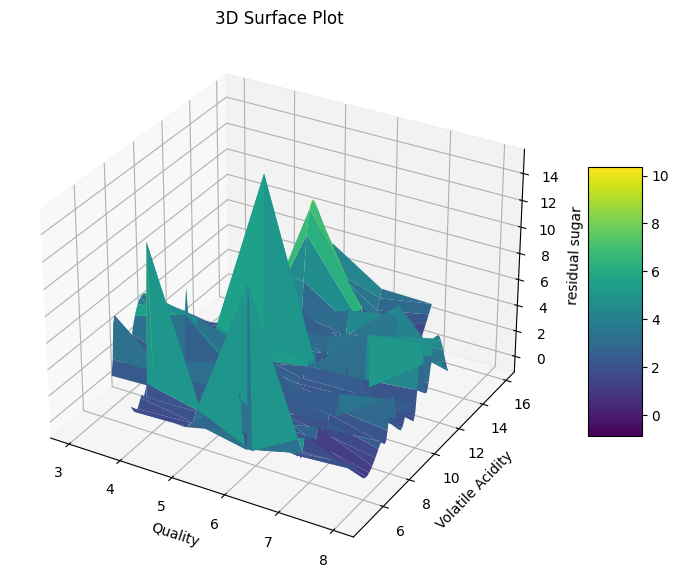

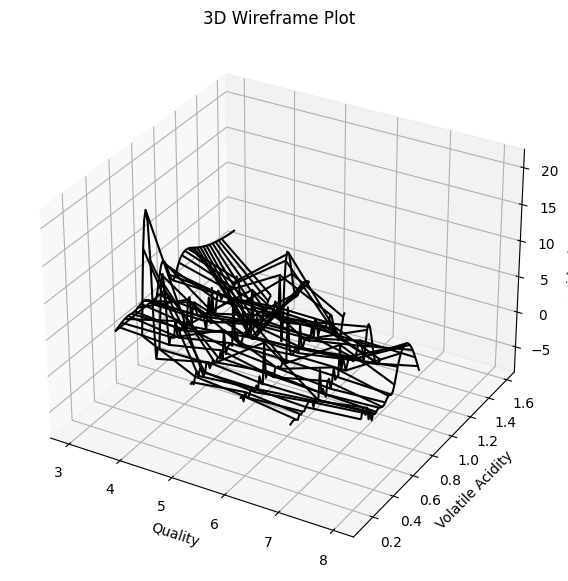

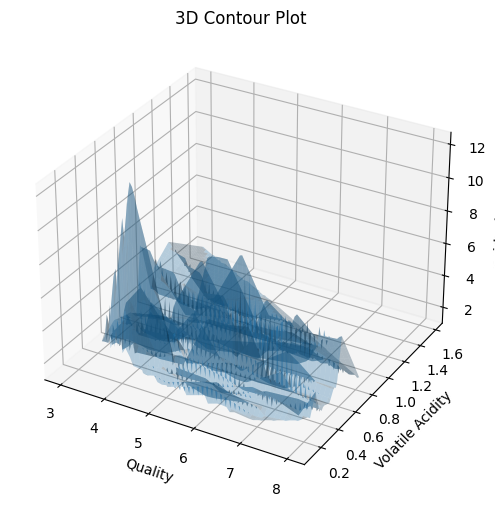

In [ ]:
sns.kdeplot(data=wine_dataset, x="quality", y="fixed acidity", cmap="viridis", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['residual sugar']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('residual sugar')
ax.set_title('3D Contour Plot')

plt.show()


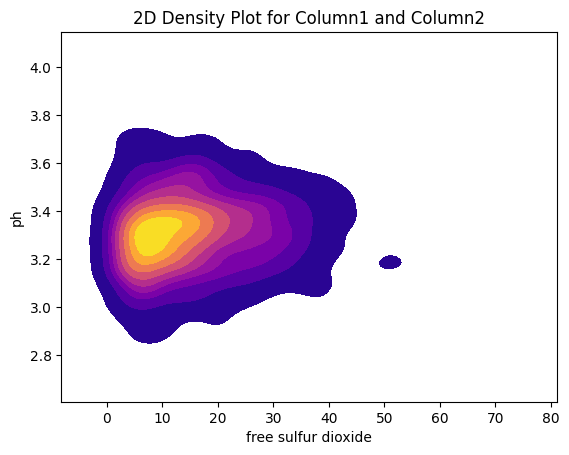

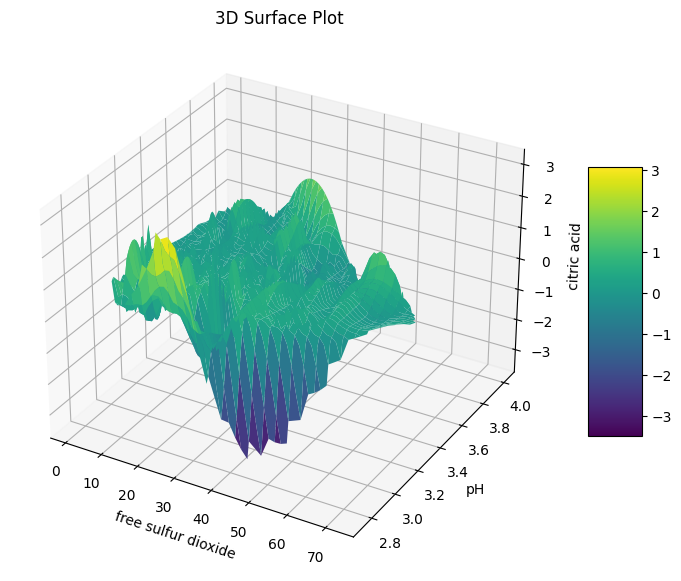

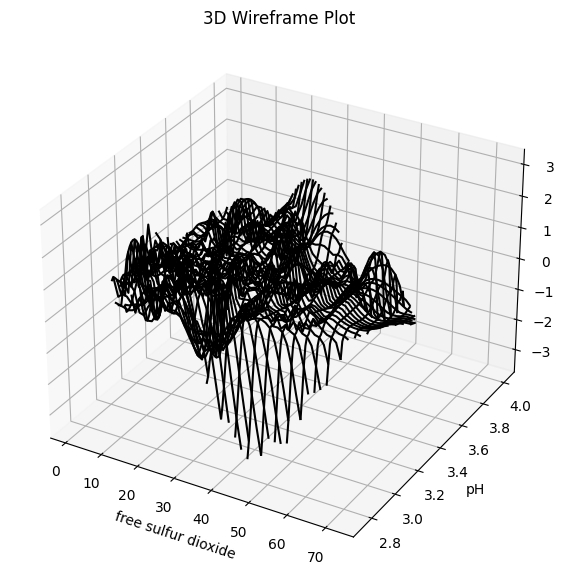

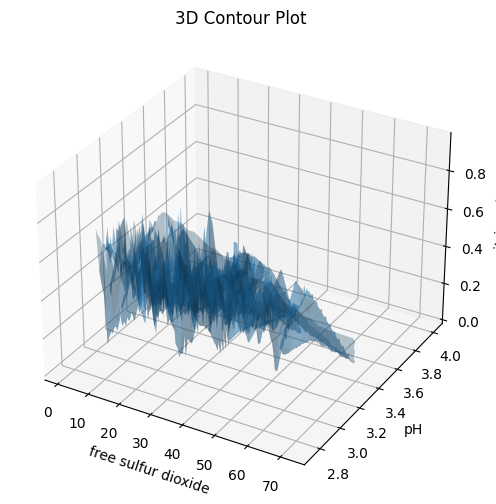

In [ ]:
sns.kdeplot(data=wine_dataset, x="free sulfur dioxide", y="pH", cmap="plasma", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('free sulfur dioxide')
plt.ylabel('ph')
plt.show()

!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'free sulfur dioxide' and 'pH' columns
x = wine_dataset['free sulfur dioxide']
y = wine_dataset['pH']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('pH')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'free sulfur dioxide' and 'pH' columns
x = wine_dataset['free sulfur dioxide']
y = wine_dataset['pH']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('pH')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['free sulfur dioxide']
y = wine_dataset['pH']
z = wine_dataset['citric acid']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('pH')
ax.set_zlabel('citric acid')
ax.set_title('3D Contour Plot')

plt.show()

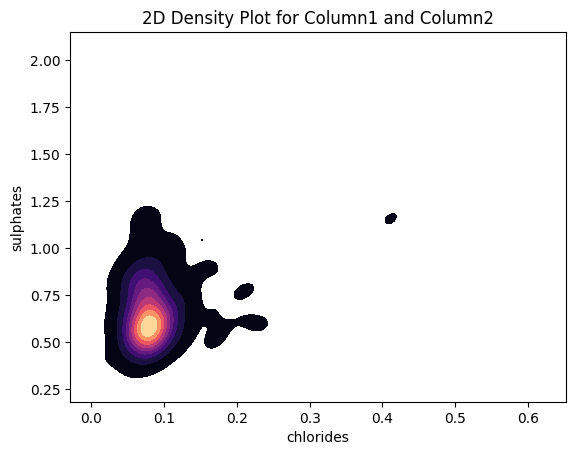

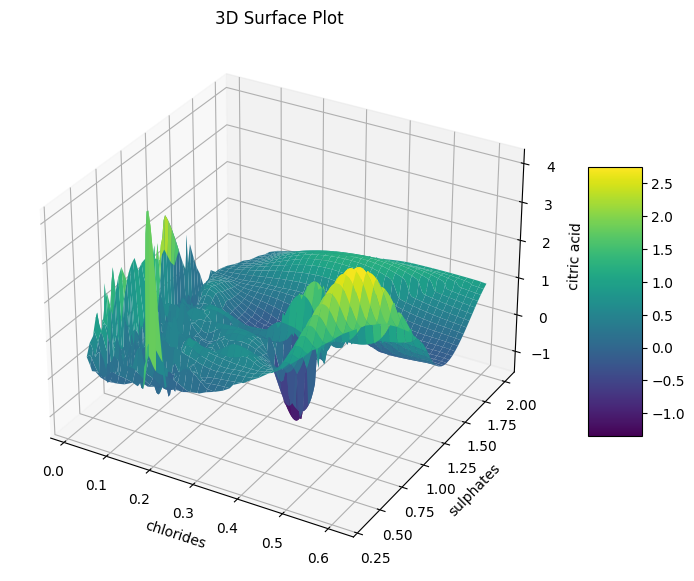

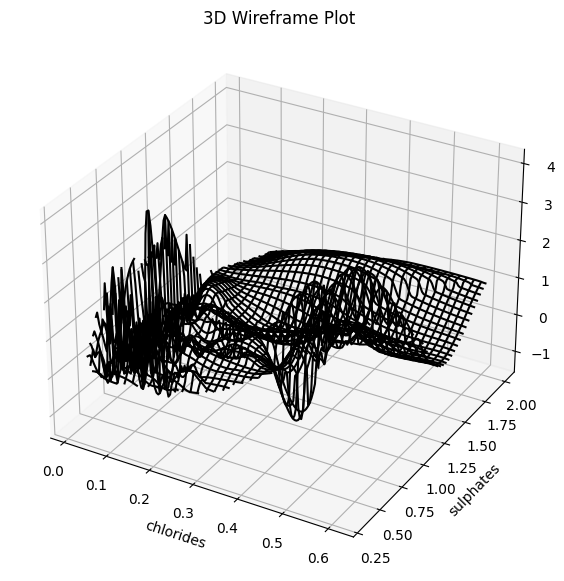

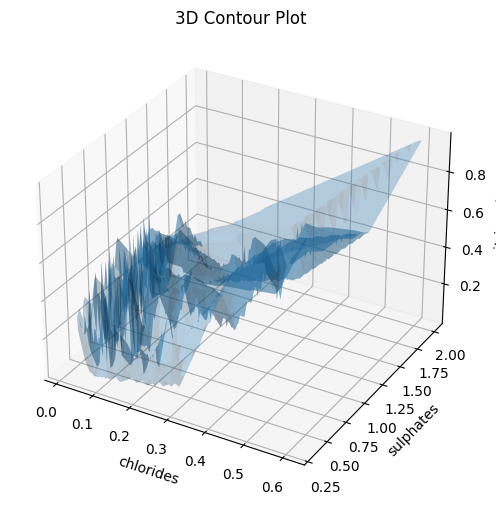

In [ ]:
sns.kdeplot(data=wine_dataset, x="chlorides", y="sulphates", cmap="magma", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('chlorides')
plt.ylabel('sulphates')
plt.show()

!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'chlorides' and 'sulphates' columns
x = wine_dataset['chlorides']
y = wine_dataset['sulphates']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'chlorides' and 'sulphates' columns
x = wine_dataset['chlorides']
y = wine_dataset['sulphates']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['chlorides']
y = wine_dataset['sulphates']
z = wine_dataset['citric acid']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')
ax.set_title('3D Contour Plot')

plt.show()

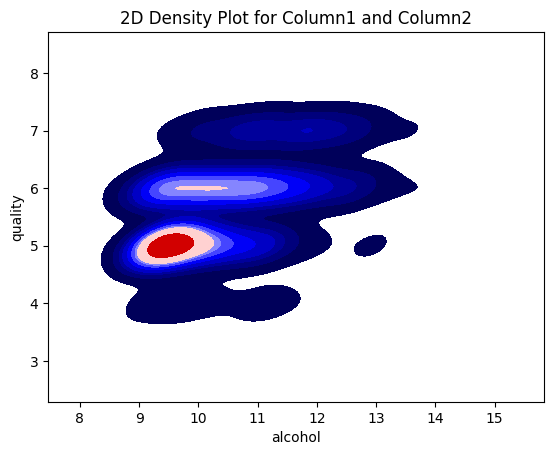

In [ ]:
sns.kdeplot(data=wine_dataset, x="alcohol", y="quality", cmap="seismic", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

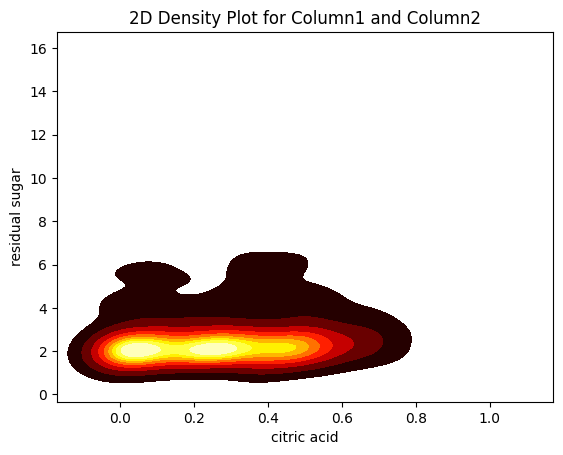

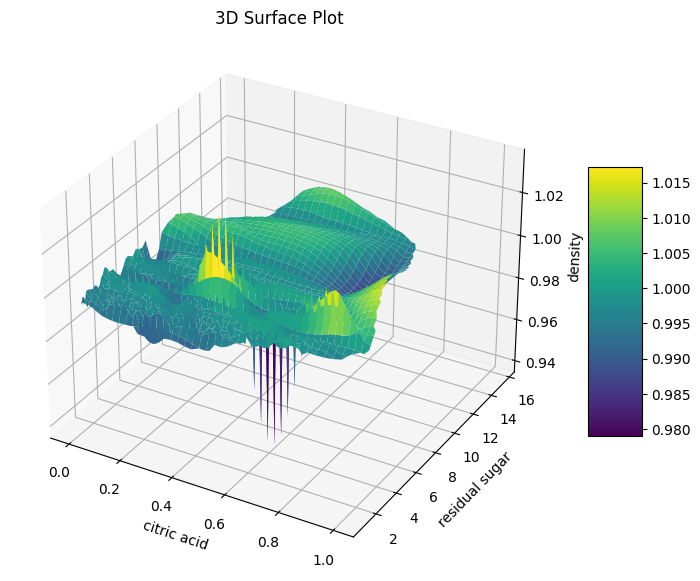

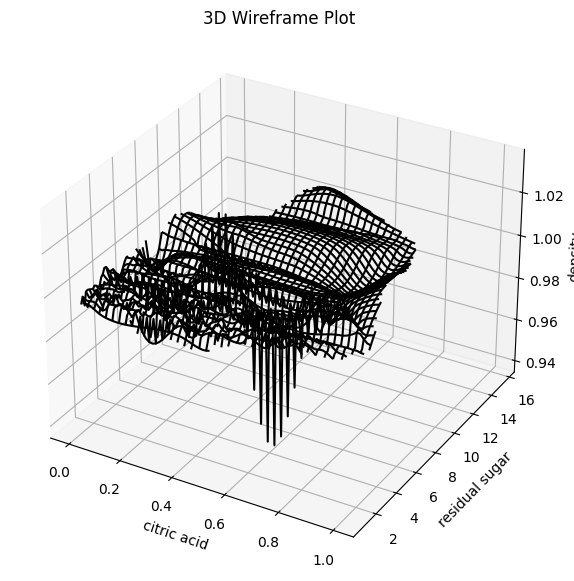

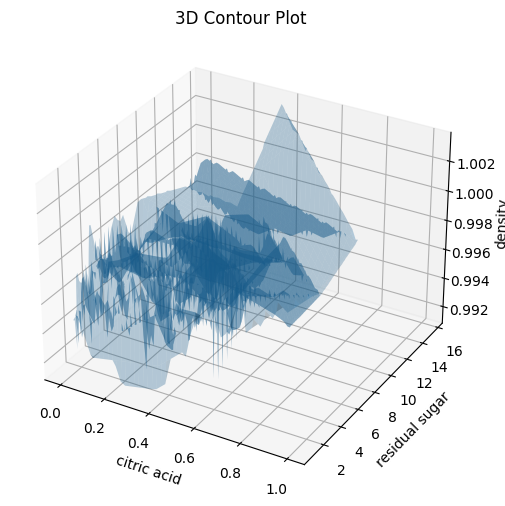

In [ ]:
sns.kdeplot(data=wine_dataset, x="citric acid", y="residual sugar", cmap="hot", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('citric acid')
plt.ylabel('residual sugar')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citic acid' and 'residual sugar' columns
x = wine_dataset['citric acid']
y = wine_dataset['residual sugar']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('residual sugar')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citic acid' and 'residual sugar' columns
x = wine_dataset['citric acid']
y = wine_dataset['residual sugar']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('residual sugar')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['citric acid']
y = wine_dataset['residual sugar']
z = wine_dataset['density']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('residual sugar')
ax.set_zlabel('density')
ax.set_title('3D Contour Plot')

plt.show()

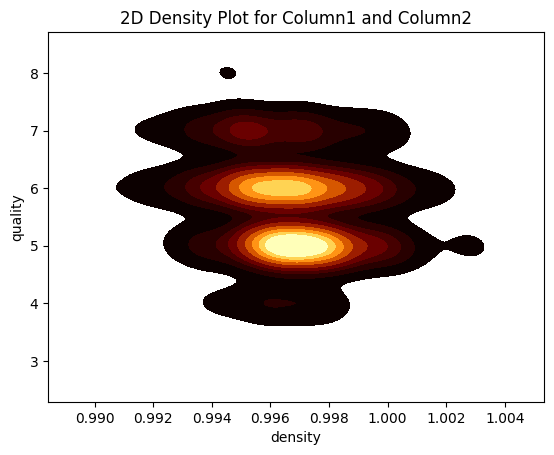

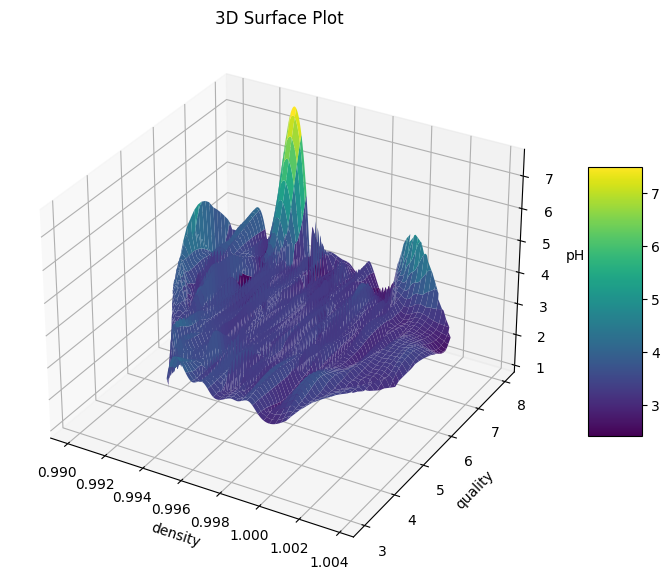

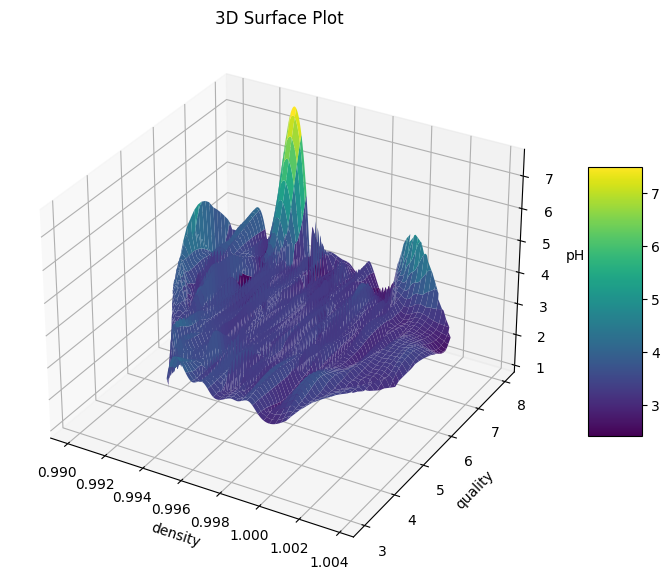

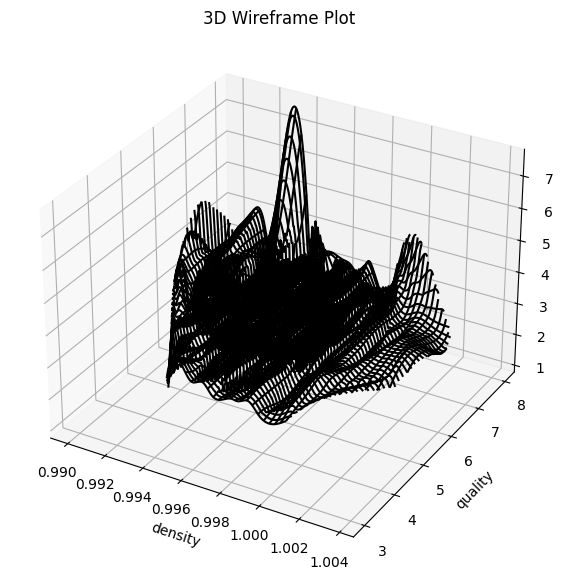

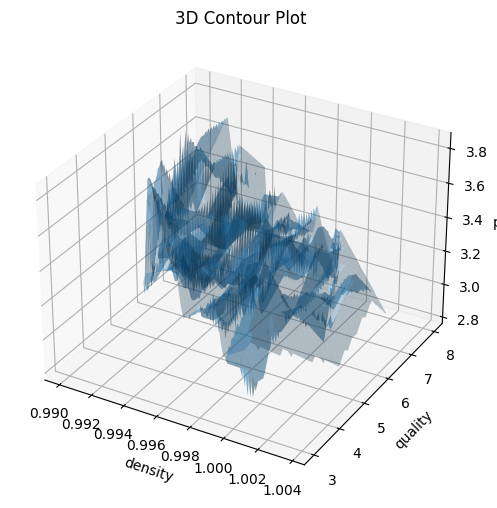

In [ ]:
sns.kdeplot(data=wine_dataset, x="density", y="quality", cmap="afmhot", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('density')
plt.ylabel('quality')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'density' and 'quality' columns
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'density' and 'quality' columns
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'density' and 'quality' columns
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')
ax.set_title('3D Contour Plot')

plt.show()


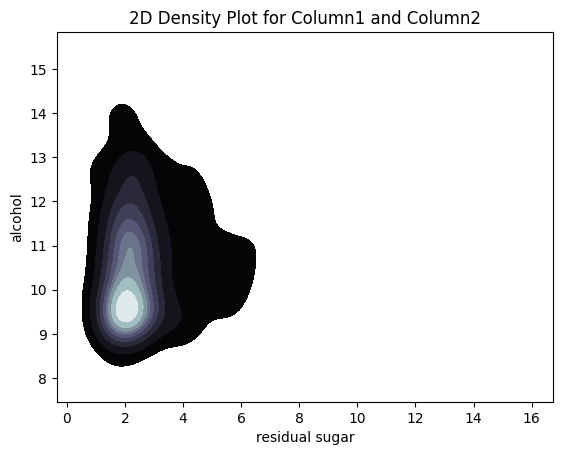

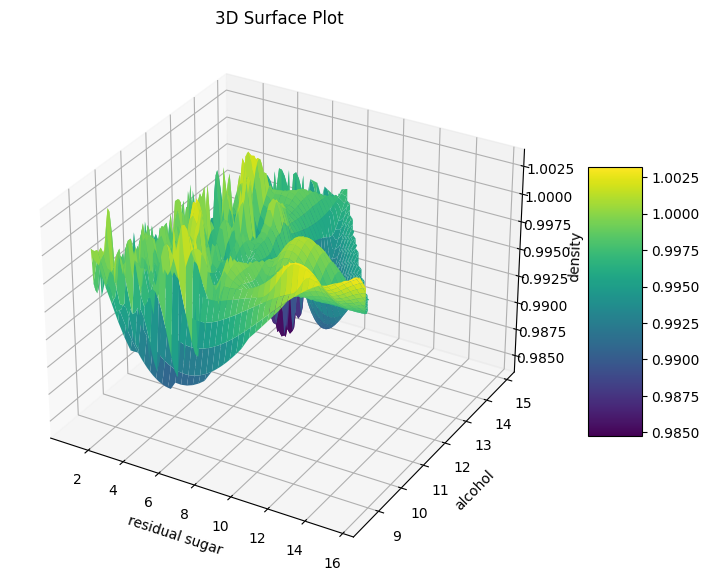

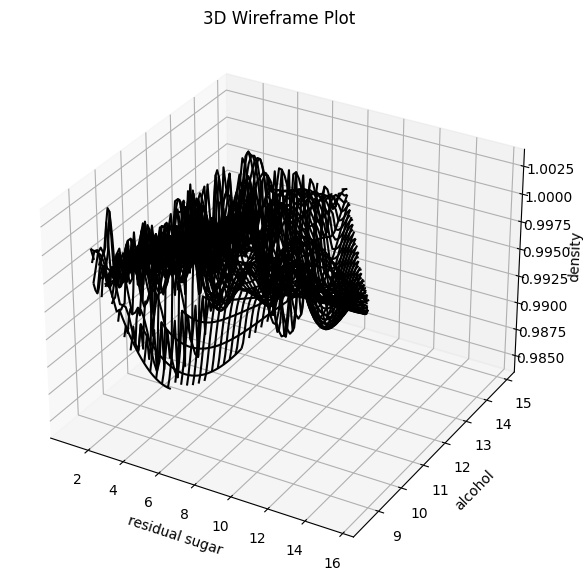

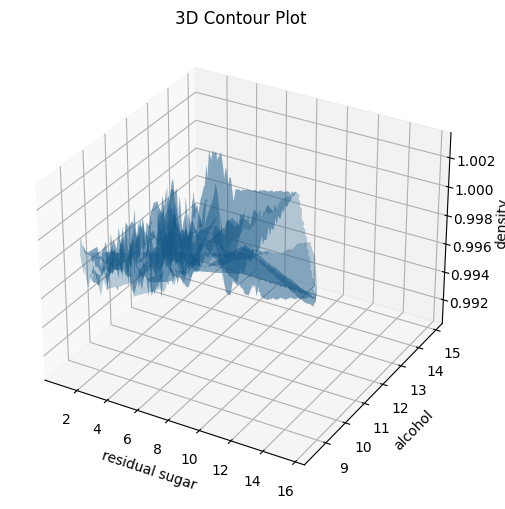

In [ ]:
sns.kdeplot(data=wine_dataset, x="residual sugar", y="alcohol", cmap="bone", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.show()
#density
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'residual sugar' and 'alcohol' columns
x = wine_dataset['residual sugar']
y = wine_dataset['alcohol']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('residual sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'residual sugar' and 'alcohol' columns
x = wine_dataset['residual sugar']
y = wine_dataset['alcohol']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('residual sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['residual sugar']
y = wine_dataset['alcohol']
z = wine_dataset['density']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('residual sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('density')
ax.set_title('3D Contour Plot')

plt.show()

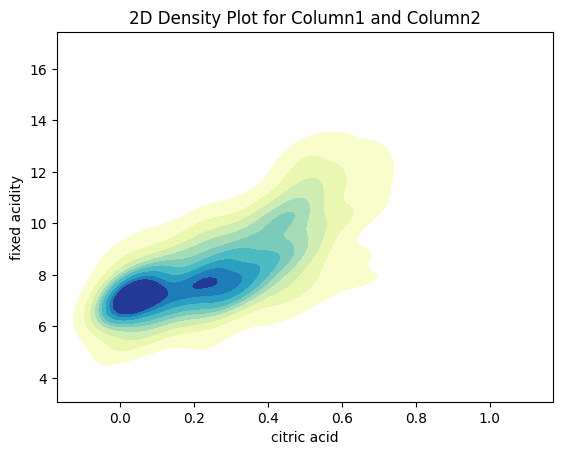

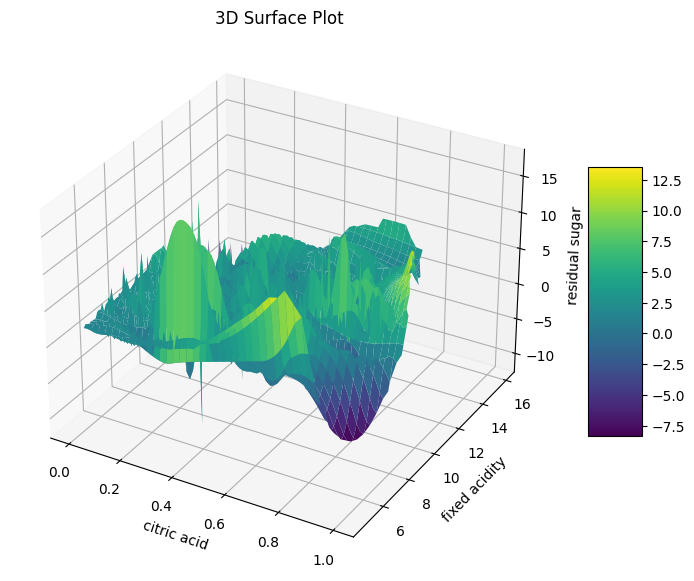

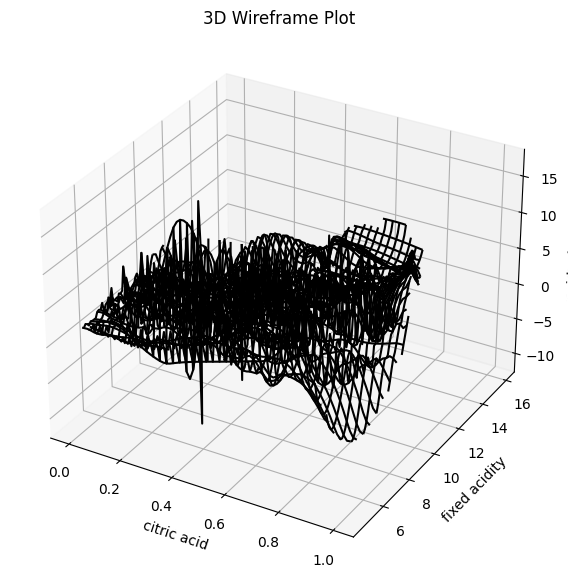

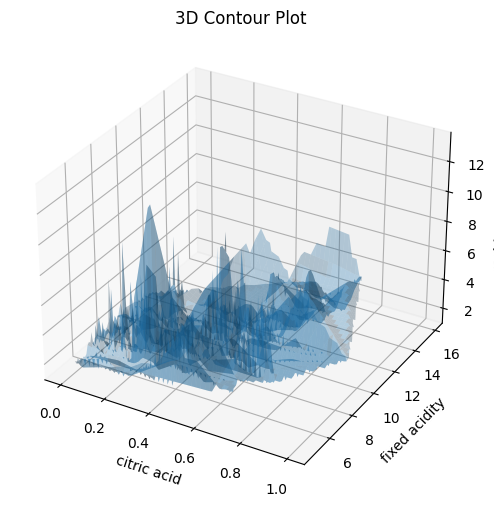

In [ ]:
sns.kdeplot(data=wine_dataset, x="citric acid", y="fixed acidity", cmap="YlGnBu", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citric acid' and 'fixed acidity' columns
x = wine_dataset['citric acid']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citric acid' and 'fixed acidity' columns
x = wine_dataset['citric acid']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['citric acid']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('residual sugar')
ax.set_title('3D Contour Plot')

plt.show()

<Axes: >

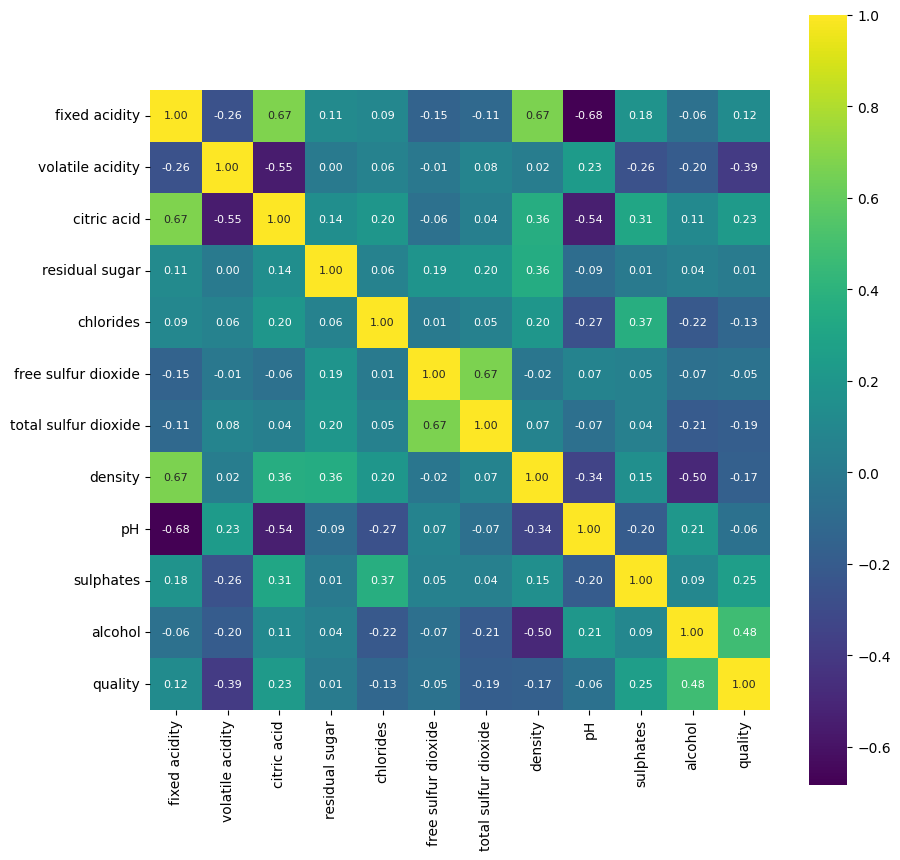

In [ ]:
correlation = wine_dataset.corr()
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'viridis')

In [ ]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, Y_train)


GaussianNB()

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.85625


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Fit the model on the training data
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.665625


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes model
model = BernoulliNB()

# Fit the model on the training data
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.884375


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# For classification
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
# Fit the model on the training data
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.90625


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# For classification
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.925


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# For regression
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [ ]:
from sklearn.svm import SVC

# Create a Support Vector Classifier
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, Y_train)

# Now you can use svm_model to make predictions, for example:
# predictions = svm_model.predict(X_test)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.928125


In [ ]:
from sklearn.svm import SVR

# Create a Support Vector Regressor
svm_regressor = SVR()

# Fit the model on the training data
svm_regressor.fit(X_train, Y_train)

# Now you can use svm_regressor to make predictions, for example:
# predictions = svm_regressor.predict(X_test)

# Now you can use svm_model to make predictions, for example:
# predictions = svm_model.predict(X_test)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, # Number of trees in the forest
                                       random_state=42)  # Random state for reproducibility

# Fit the model on the training data
rf_classifier.fit(X_train, Y_train)

# Now you can use rf_classifier to make predictions, for example:
# predictions = rf_classifier.predict(X_test)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, # Number of trees in the forest
                                     random_state=42)  # Random state for reproducibility

# Fit the model on the training data
rf_regressor.fit(X_train, Y_train)

# Now you can use rf_regressor to make predictions, for example:
# predictions = rf_regressor.predict(X_test)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors Classifier
# n_neighbors is the number of neighbors to use
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train, Y_train)

# Now you can use knn_classifier to make predictions, for example:
# predictions = knn_classifier.predict(X_test)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors Regressor
# n_neighbors is the number of neighbors to use
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, Y_train)

# Now you can use knn_regressor to make predictions, for example:
# predictions = knn_regressor.predict(X_test)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [ ]:
from sklearn.cluster import KMeans

# Train K-means on the training data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Assign clusters to the test data based on these trained centroids
test_clusters = kmeans.predict(X_test)
from sklearn.metrics import silhouette_score

# Calculate silhouette score on the test data
silhouette = silhouette_score(X_test, test_clusters)
print(f"Silhouette Score on Test Data: {silhouette}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score on Test Data: 0.5114402037752896


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 1.9682079585264244e-29
R-squared Score: 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Create and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
# Make predictions on the test set
Y_test_prediction = log_reg.predict(X_test)

# Calculate accuracy on test data
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)
print('Accuracy:', test_data_accuracy)


Accuracy: 0.884375


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a simple Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # One output node for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/10
40/40 [==============================] - 2s 5ms/step - loss: 19.7567
Epoch 2/10
40/40 [==============================] - 0s 9ms/step - loss: 1.7205
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5664
Epoch 4/10
40/40 [==============================] - 0s 8ms/step - loss: 0.1977
Epoch 5/10
40/40 [==============================] - 0s 9ms/step - loss: 0.0817
Epoch 6/10
40/40 [==============================] - 0s 11ms/step - loss: 0.0406
Epoch 7/10
40/40 [==============================] - 0s 10ms/step - loss: 0.0290
Epoch 8/10
40/40 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 9/10
40/40 [==============================] - 0s 9ms/step - loss: 0.0220
Epoch 10/10
10/10 [==============================] - 0s 3ms/step
Mean Squared Error: 0.013941691108458942


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")


Epoch 1/20
40/40 [==============================] - 2s 4ms/step - loss: 0.8762
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0302
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 8/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 9/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 10/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 11/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0098
Epoch 12/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 13/20
40/40 [==============================

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/30
40/40 [==============================] - 2s 5ms/step - loss: 0.7146
Epoch 2/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 3/30
40/40 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 4/30
40/40 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 5/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 6/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 7/30
40/40 [==============================] - 1s 13ms/step - loss: 0.0036
Epoch 8/30
40/40 [==============================] - 1s 13ms/step - loss: 0.0026
Epoch 9/30
40/40 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 10/30
40/40 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 11/30
40/40 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 12/30
40/40 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 13/30
40/40 [===========================

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=40, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")


Epoch 1/40
40/40 [==============================] - 1s 4ms/step - loss: 0.8671
Epoch 2/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0296
Epoch 3/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 4/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 5/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 6/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 7/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 8/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 9/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 10/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 11/40
40/40 [==============================] - 0s 4ms/step - loss: 8.3152e-04
Epoch 12/40
40/40 [==============================] - 0s 5ms/step - loss: 9.8205e-04
Epoch 13/40
40/40 [======================

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/50
40/40 [==============================] - 2s 6ms/step - loss: 0.7436
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 8.9361e-04
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 8.3255e-04
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 9.5662e-04
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 9.0539e-04
Epoch 10/50
40/40 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 11/50
40/40 [==============================] - 0s 6ms/step - loss: 7.9095e-04
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 13/50
40/40 [==========

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=60, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/60
40/40 [==============================] - 2s 5ms/step - loss: 0.4901
Epoch 2/60
40/40 [==============================] - 0s 7ms/step - loss: 0.0104
Epoch 3/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 4/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 5/60
40/40 [==============================] - 0s 3ms/step - loss: 7.5426e-04
Epoch 6/60
40/40 [==============================] - 0s 3ms/step - loss: 7.4201e-04
Epoch 7/60
40/40 [==============================] - 0s 3ms/step - loss: 7.4421e-04
Epoch 8/60
40/40 [==============================] - 0s 4ms/step - loss: 7.0713e-04
Epoch 9/60
40/40 [==============================] - 0s 4ms/step - loss: 6.1471e-04
Epoch 10/60
40/40 [==============================] - 0s 4ms/step - loss: 5.0511e-04
Epoch 11/60
40/40 [==============================] - 0s 3ms/step - loss: 5.0973e-04
Epoch 12/60
40/40 [==============================] - 0s 5ms/step - loss: 4.7014e-04
Epoch 13/60
40/40

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=70, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/70
40/40 [==============================] - 2s 6ms/step - loss: 0.1893
Epoch 2/70
40/40 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 3/70
40/40 [==============================] - 0s 6ms/step - loss: 4.8052e-04
Epoch 4/70
40/40 [==============================] - 0s 4ms/step - loss: 4.3865e-04
Epoch 5/70
40/40 [==============================] - 0s 5ms/step - loss: 3.3640e-04
Epoch 6/70
40/40 [==============================] - 0s 5ms/step - loss: 3.0681e-04
Epoch 7/70
40/40 [==============================] - 0s 5ms/step - loss: 2.8552e-04
Epoch 8/70
40/40 [==============================] - 0s 4ms/step - loss: 2.4348e-04
Epoch 9/70
40/40 [==============================] - 0s 4ms/step - loss: 2.4696e-04
Epoch 10/70
40/40 [==============================] - 0s 5ms/step - loss: 4.5603e-04
Epoch 11/70
40/40 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 12/70
40/40 [==============================] - 0s 4ms/step - loss: 9.7806e-04
Epoch 13/70
4

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=80, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/80
40/40 [==============================] - 1s 2ms/step - loss: 0.3773
Epoch 2/80
40/40 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 3/80
40/40 [==============================] - 0s 2ms/step - loss: 6.1547e-04
Epoch 4/80
40/40 [==============================] - 0s 2ms/step - loss: 2.9189e-04
Epoch 5/80
40/40 [==============================] - 0s 2ms/step - loss: 2.8910e-04
Epoch 6/80
40/40 [==============================] - 0s 2ms/step - loss: 2.2838e-04
Epoch 7/80
40/40 [==============================] - 0s 2ms/step - loss: 1.9374e-04
Epoch 8/80
40/40 [==============================] - 0s 2ms/step - loss: 1.8369e-04
Epoch 9/80
40/40 [==============================] - 0s 2ms/step - loss: 2.9099e-04
Epoch 10/80
40/40 [==============================] - 0s 2ms/step - loss: 1.6796e-04
Epoch 11/80
40/40 [==============================] - 0s 2ms/step - loss: 1.6065e-04
Epoch 12/80
40/40 [==============================] - 0s 2ms/step - loss: 1.4320e-04
Epoch 13/

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=90, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/90
40/40 [==============================] - 1s 2ms/step - loss: 0.2495
Epoch 2/90
40/40 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 3/90
40/40 [==============================] - 0s 3ms/step - loss: 4.1248e-04
Epoch 4/90
40/40 [==============================] - 0s 3ms/step - loss: 2.1489e-04
Epoch 5/90
40/40 [==============================] - 0s 2ms/step - loss: 2.1059e-04
Epoch 6/90
40/40 [==============================] - 0s 2ms/step - loss: 1.6996e-04
Epoch 7/90
40/40 [==============================] - 0s 3ms/step - loss: 1.7580e-04
Epoch 8/90
40/40 [==============================] - 0s 3ms/step - loss: 1.5646e-04
Epoch 9/90
40/40 [==============================] - 0s 3ms/step - loss: 1.5327e-04
Epoch 10/90
40/40 [==============================] - 0s 2ms/step - loss: 1.6010e-04
Epoch 11/90
40/40 [==============================] - 0s 3ms/step - loss: 1.4704e-04
Epoch 12/90
40/40 [==============================] - 0s 3ms/step - loss: 2.2616e-04
Epoch 13/

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 0.2078
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 7.5959e-04
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 2.4587e-04
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 1.7064e-04
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3524e-04
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 1.5697e-04
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 1.5527e-04
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0680e-04
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1242e-04
Epoch 11/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1567e-04
Epoch 12/100
40/40 [==============================] - 0s 2ms/step - loss: 1.7745e-

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=110, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/110
40/40 [==============================] - 1s 2ms/step - loss: 0.1233
Epoch 2/110
40/40 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 3/110
40/40 [==============================] - 0s 3ms/step - loss: 1.8475e-04
Epoch 4/110
40/40 [==============================] - 0s 4ms/step - loss: 1.3360e-04
Epoch 5/110
40/40 [==============================] - 0s 4ms/step - loss: 1.1860e-04
Epoch 6/110
40/40 [==============================] - 0s 4ms/step - loss: 1.2103e-04
Epoch 7/110
40/40 [==============================] - 0s 4ms/step - loss: 1.2556e-04
Epoch 8/110
40/40 [==============================] - 0s 4ms/step - loss: 8.7562e-05
Epoch 9/110
40/40 [==============================] - 0s 4ms/step - loss: 7.1606e-05
Epoch 10/110
40/40 [==============================] - 0s 3ms/step - loss: 8.1700e-05
Epoch 11/110
40/40 [==============================] - 0s 3ms/step - loss: 1.0708e-04
Epoch 12/110
40/40 [==============================] - 0s 3ms/step - loss: 9.9399e-

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=120, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/120
40/40 [==============================] - 1s 2ms/step - loss: 0.1635
Epoch 2/120
40/40 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 3/120
40/40 [==============================] - 0s 2ms/step - loss: 1.8291e-04
Epoch 4/120
40/40 [==============================] - 0s 2ms/step - loss: 7.1565e-05
Epoch 5/120
40/40 [==============================] - 0s 3ms/step - loss: 6.1512e-05
Epoch 6/120
40/40 [==============================] - 0s 3ms/step - loss: 6.9756e-05
Epoch 7/120
40/40 [==============================] - 0s 2ms/step - loss: 5.9305e-05
Epoch 8/120
40/40 [==============================] - 0s 2ms/step - loss: 5.3166e-05
Epoch 9/120
40/40 [==============================] - 0s 2ms/step - loss: 5.5213e-05
Epoch 10/120
40/40 [==============================] - 0s 2ms/step - loss: 5.0867e-05
Epoch 11/120
40/40 [==============================] - 0s 2ms/step - loss: 5.4533e-05
Epoch 12/120
40/40 [==============================] - 0s 3ms/step - loss: 4.9353e-

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=130, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/130
40/40 [==============================] - 1s 2ms/step - loss: 0.0585
Epoch 2/130
40/40 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 3/130
40/40 [==============================] - 0s 2ms/step - loss: 1.5458e-04
Epoch 4/130
40/40 [==============================] - 0s 2ms/step - loss: 6.4815e-05
Epoch 5/130
40/40 [==============================] - 0s 2ms/step - loss: 6.6185e-05
Epoch 6/130
40/40 [==============================] - 0s 2ms/step - loss: 5.2192e-05
Epoch 7/130
40/40 [==============================] - 0s 2ms/step - loss: 5.4760e-05
Epoch 8/130
40/40 [==============================] - 0s 2ms/step - loss: 7.8547e-05
Epoch 9/130
40/40 [==============================] - 0s 3ms/step - loss: 7.7783e-05
Epoch 10/130
40/40 [==============================] - 0s 2ms/step - loss: 8.6237e-05
Epoch 11/130
40/40 [==============================] - 0s 2ms/step - loss: 6.9018e-05
Epoch 12/130
40/40 [==============================] - 0s 2ms/step - loss: 5.2229e-

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=140, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/140
40/40 [==============================] - 1s 2ms/step - loss: 0.0669
Epoch 2/140
40/40 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 3/140
40/40 [==============================] - 0s 2ms/step - loss: 1.5634e-04
Epoch 4/140
40/40 [==============================] - 0s 2ms/step - loss: 1.1130e-04
Epoch 5/140
40/40 [==============================] - 0s 3ms/step - loss: 8.2325e-05
Epoch 6/140
40/40 [==============================] - 0s 2ms/step - loss: 6.8297e-05
Epoch 7/140
40/40 [==============================] - 0s 2ms/step - loss: 6.7628e-05
Epoch 8/140
40/40 [==============================] - 0s 2ms/step - loss: 8.9417e-05
Epoch 9/140
40/40 [==============================] - 0s 2ms/step - loss: 7.9446e-05
Epoch 10/140
40/40 [==============================] - 0s 2ms/step - loss: 5.1756e-05
Epoch 11/140
40/40 [==============================] - 0s 2ms/step - loss: 7.8210e-05
Epoch 12/140
40/40 [==============================] - 0s 2ms/step - loss: 7.2467e-

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=170, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/170
40/40 [==============================] - 1s 2ms/step - loss: 0.0539
Epoch 2/170
40/40 [==============================] - 0s 4ms/step - loss: 5.7846e-04
Epoch 3/170
40/40 [==============================] - 0s 4ms/step - loss: 4.2076e-05
Epoch 4/170
40/40 [==============================] - 0s 4ms/step - loss: 3.3726e-05
Epoch 5/170
40/40 [==============================] - 0s 3ms/step - loss: 3.2530e-05
Epoch 6/170
40/40 [==============================] - 0s 4ms/step - loss: 2.8770e-05
Epoch 7/170
40/40 [==============================] - 0s 3ms/step - loss: 2.9472e-05
Epoch 8/170
40/40 [==============================] - 0s 3ms/step - loss: 2.9172e-05
Epoch 9/170
40/40 [==============================] - 0s 3ms/step - loss: 3.1787e-05
Epoch 10/170
40/40 [==============================] - 0s 3ms/step - loss: 2.7395e-05
Epoch 11/170
40/40 [==============================] - 0s 4ms/step - loss: 2.7705e-05
Epoch 12/170
40/40 [==============================] - 0s 3ms/step - loss: 2.58

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Create the Lasso Regression model
# alpha is the regularization strength; you might need to tune this
lasso_reg = Lasso(alpha=0.01)  # start with a small alpha, like 0.01, and adjust as needed

# Train the model
lasso_reg.fit(X_train, y_train)
# Make predictions on the test set
y_test_pred = lasso_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.709900437292403e-05


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Create the Ridge Regression model
ridge_reg = Ridge(alpha=0.01)  # start with a small alpha, like 0.01, and adjust as needed

# Train the model
ridge_reg.fit(X_train, y_train)
# Make predictions on the test set
y_test_pred = ridge_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.322923781128418e-11


In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import numpy as np
# Create and fit the MeanShift model
meanshift = MeanShift(bandwidth=10)  # Bandwidth is a hyperparameter; you might need to adjust it
meanshift.fit(X)
# Cluster centers
centers = meanshift.cluster_centers_
print("Cluster Centers:", centers)

# Predict cluster labels for the data points
labels = meanshift.labels_
# Assuming you have some ground truth labels to compare against
ground_truth_labels = np.array([...])  # Replace with your actual labels

# Silhouette Score
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")

Cluster Centers: [[8.72307692e+00 5.17079002e-01 2.94553015e-01 2.42837838e+00
  8.58149688e-02 6.85446985e+00 1.72016632e+01 9.96715322e-01
  3.29311850e+00 6.52910603e-01 1.06304574e+01]
 [7.70000000e+00 6.20921053e-01 2.32105263e-01 2.41447368e+00
  8.67894737e-02 1.79605263e+01 8.84736842e+01 9.96865789e-01
  3.35434211e+00 6.18947368e-01 9.99649123e+00]
 [8.07741935e+00 5.57580645e-01 2.85000000e-01 2.47258065e+00
  9.35000000e-02 1.82258065e+01 7.69516129e+01 9.97233871e-01
  3.33112903e+00 6.38064516e-01 9.99193548e+00]
 [7.71458333e+00 5.80312500e-01 2.60208333e-01 2.74583333e+00
  8.84583333e-02 1.76875000e+01 1.02895833e+02 9.96741875e-01
  3.30291667e+00 6.50208333e-01 1.00284722e+01]
 [8.10937500e+00 5.65625000e-01 2.92812500e-01 2.69687500e+00
  8.79375000e-02 2.15937500e+01 1.14000000e+02 9.97229375e-01
  3.24875000e+00 6.69062500e-01 9.63750000e+00]
 [8.16333333e+00 5.27166667e-01 2.84000000e-01 2.82500000e+00
  7.94666667e-02 3.09333333e+01 1.01600000e+02 9.96379333e-01

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
# Create and fit the DBSCAN model
# eps and min_samples are hyperparameters; you might need to adjust them
dbscan = DBSCAN(eps=0.9, min_samples=5)  # Example values; adjust as needed
dbscan.fit(X)
# Cluster labels
labels = dbscan.labels_

# Identify core samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Number of clusters (excluding noise)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Estimated number of clusters: {n_clusters_}")
# Cluster labels
labels = dbscan.labels_

# Silhouette Score, excluding noise if present
if n_clusters_ > 1:
    silhouette = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette Score not applicable for a single cluster.")

Estimated number of clusters: 2
Silhouette Score: -0.5057672289689639


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# Create and fit the Agglomerative Hierarchical model
# The number of clusters can be set, or you can let the algorithm determine it naturally
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Example: specifying 2 clusters
agg_clustering.fit(X)
# Cluster labels
labels = agg_clustering.labels_
# Silhouette Score
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.41101924183058636


In [ ]:
import numpy as np
import random

# Parameters
gamma = 0.75  # Discount factor
alpha = 0.9   # Learning rate
num_episodes = 1000
num_states = 5    # Example number of states
num_actions = 2   # Example number of actions

# Initialize Q-table randomly
Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

# Dummy environment response for demonstration (to be replaced with actual environment logic)
# It should return a new state and a reward given a state and an action
def step(state, action):
    new_state = np.random.randint(0, num_states)
    reward = np.random.random()
    return new_state, reward

# Q-learning algorithm
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)  # Start at a random state

    while True:
        # Choose an action (either random for exploration, or use the current Q-table)
        if random.uniform(0, 1) < 0.1:  # Exploration factor
            action = np.random.randint(0, num_actions)
        else:
            action = np.argmax(Q[state, :])

        # Take the action, and observe the new state and reward
        new_state, reward = step(state, action)

        # Update Q-table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        # Update state
        state = new_state

        # Break if end of episode (to be defined according to your environment)
        if ...:  # Add a condition to break the loop when the episode ends
            break

print("Q-table:")
print(Q)


Q-table:
[[2.25353086 1.53717461]
 [1.33824102 2.3733369 ]
 [1.94200269 1.14625263]
 [2.45402682 1.39874627]
 [1.48882469 1.86978085]]


In [ ]:
import numpy as np
import random

# Parameters
gamma = 0.75  # Discount factor
alpha = 0.9   # Learning rate
num_episodes = 1000
num_states = 5    # Example number of states
num_actions = 2   # Example number of actions

# Initialize Q-table randomly
Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

# Dummy environment response for demonstration (replace with your environment)
def step(state, action):
    new_state = np.random.randint(0, num_states)
    reward = np.random.random()  # Random reward
    return new_state, reward

# Q-learning algorithm with cumulative reward tracking
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)  # Start at a random state
    total_reward = 0  # Reset total reward for each episode

    while True:
        # Choose an action using an epsilon-greedy strategy
        if random.uniform(0, 1) < 0.1:  # Exploration factor
            action = np.random.randint(0, num_actions)
        else:
            action = np.argmax(Q[state, :])

        # Take the action, and observe the new state and reward
        new_state, reward = step(state, action)

        # Update the Q-table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        # Update total reward
        total_reward += reward

        # Update state
        state = new_state

        # Break if end of episode (this depends on your specific environment)
        if ...:  # Add condition to break the loop
            break

    # Print total reward at the end of each episode
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

print("Final Q-table:")
print(Q)


Episode 1: Total Reward = 0.34409157690092107
Episode 2: Total Reward = 0.8748327291924444
Episode 3: Total Reward = 0.08307790244746294
Episode 4: Total Reward = 0.06577713675093044
Episode 5: Total Reward = 0.83445140592505
Episode 6: Total Reward = 0.8577466792335837
Episode 7: Total Reward = 0.9457826375816869
Episode 8: Total Reward = 0.3919840496496051
Episode 9: Total Reward = 0.2999016568225029
Episode 10: Total Reward = 0.9386559131296438
Episode 11: Total Reward = 0.4693248195497651
Episode 12: Total Reward = 0.42911485044907627
Episode 13: Total Reward = 0.7291587712686705
Episode 14: Total Reward = 0.1686059429076847
Episode 15: Total Reward = 0.8875325591395277
Episode 16: Total Reward = 0.23192889773264214
Episode 17: Total Reward = 0.2014456298924726
Episode 18: Total Reward = 0.483589926467201
Episode 19: Total Reward = 0.11262415737259623
Episode 20: Total Reward = 0.4833355273508477
Episode 21: Total Reward = 0.4445833386430508
Episode 22: Total Reward = 0.51907462673

In [ ]:
import numpy as np
import random

# Environment parameters
num_states = 5
num_actions = 2

# R-learning parameters
alpha = 0.5  # Learning rate
beta = 0.01  # Learning rate for average reward
num_episodes = 1000
epsilon = 0.1  # Exploration rate

# Initialize R-table and average reward
R = np.zeros((num_states, num_actions))
rho = 0  # Average reward

# Dummy environment (replace with your environment)
def step(state, action):
    new_state = np.random.randint(0, num_states)
    reward = np.random.rand()
    return new_state, reward

# R-learning algorithm
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)

    while True:  # Replace with your episode ending condition
        # Choose action (epsilon-greedy strategy)
        if random.random() < epsilon:
            action = np.random.randint(0, num_actions)
        else:
            action = np.argmax(R[state, :] + rho)

        # Take action and observe new state and reward
        new_state, reward = step(state, action)

        # Update R-table
        next_max = np.max(R[new_state, :])
        R[state, action] += alpha * (reward - rho + next_max - R[state, action])

        # Update average reward
        rho += beta * (reward - rho + next_max - np.max(R[state, :]))

        # Move to the new state
        state = new_state

        # Check for end of episode (add your condition)
        if ...:
            break

# Display final R-table
print("Final R-table:")
print(R)


Final R-table:
[[8.329802   8.27610834]
 [8.69455566 8.24859005]
 [8.17119965 8.36945819]
 [8.4594453  8.42502701]
 [8.41250877 8.19169715]]


In [ ]:
import numpy as np
import random

# Environment and R-learning parameters
num_states = 5
num_actions = 2
alpha = 0.5  # Learning rate for R-table
beta = 0.01  # Learning rate for average reward
num_episodes = 1000
epsilon = 0.1  # Exploration rate

# Initialize R-table and average reward
R = np.zeros((num_states, num_actions))
rho = 0  # Average reward

# Dummy environment (replace with your environment)
def step(state, action):
    new_state = np.random.randint(0, num_states)
    reward = np.random.rand()
    return new_state, reward

# R-learning algorithm with cumulative reward tracking
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)
    total_reward = 0  # Initialize total reward for the episode

    while True:  # Add your episode ending condition here
        # Choose an action (epsilon-greedy strategy)
        if random.random() < epsilon:
            action = np.random.randint(0, num_actions)
        else:
            action = np.argmax(R[state, :])

        # Take action and observe the new state and reward
        new_state, reward = step(state, action)
        total_reward += reward  # Accumulate the reward

        # Update R-table
        next_max = np.max(R[new_state, :])
        R[state, action] += alpha * (reward - rho + next_max - R[state, action])

        # Update average reward
        rho += beta * (reward - rho + next_max - np.max(R[state, :]))

        # Transition to the new state
        state = new_state

        # Your condition to end the episode
        if ...:
            break

    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# Display final R-table
print("Final R-table:")
print(R)


Episode 1: Total Reward = 0.36640271286213166
Episode 2: Total Reward = 0.7352403964256602
Episode 3: Total Reward = 0.41380524015919073
Episode 4: Total Reward = 0.5098543804084776
Episode 5: Total Reward = 0.25364823495010946
Episode 6: Total Reward = 0.8882057342486042
Episode 7: Total Reward = 0.33631606499390665
Episode 8: Total Reward = 0.7083711840008752
Episode 9: Total Reward = 0.3977402783554018
Episode 10: Total Reward = 0.7475351737527625
Episode 11: Total Reward = 0.19808056995670686
Episode 12: Total Reward = 0.3764542707691896
Episode 13: Total Reward = 0.3822945817837742
Episode 14: Total Reward = 0.0756055391419641
Episode 15: Total Reward = 0.46124138759987143
Episode 16: Total Reward = 0.40879401295940676
Episode 17: Total Reward = 0.7751457656756393
Episode 18: Total Reward = 0.3958261967894745
Episode 19: Total Reward = 0.12177157909698255
Episode 20: Total Reward = 0.8048944267892149
Episode 21: Total Reward = 0.8574731978957995
Episode 22: Total Reward = 0.907818

In [ ]:
import numpy as np
import random

# Parameters
num_states = 5  # Number of states
num_episodes = 1000  # Number of episodes
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor

# Initialize value function arbitrarily for all states
V = np.zeros(num_states)

# Example environment: rewards and transition probabilities
# For a more complex environment, you would replace these with dynamic responses
rewards = np.random.rand(num_states)  # Random rewards for this example
transitions = np.random.randint(num_states, size=num_states)  # Random transitions

# TD(0) Learning Algorithm
for episode in range(num_episodes):
    state = np.random.randint(num_states)  # Start from a random state

    while True:  # Add your own condition for breaking the episode
        # Randomly choosing next state for simplicity
        next_state = transitions[state]

        # TD Update
        reward = rewards[state]
        V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])

        state = next_state

        # Break if at terminal state or end of episode
        if ...:  # Add a condition to break the loop
            break

# Display final value function
print("Final value function:")
print(V)


Final value function:
[2.92585531 2.10725934 2.41262072 2.86694868 1.87717591]


In [ ]:
import numpy as np
import random

# Environment and TD Learning parameters
num_states = 5
alpha = 0.1
gamma = 0.9
num_episodes = 1000

# Initialize value function
V = np.zeros(num_states)

# Example rewards and transitions (replace with your environment logic)
rewards = np.random.rand(num_states)  # Example rewards
transitions = np.random.randint(num_states, size=num_states)  # Example transitions

# TD Learning
for episode in range(num_episodes):
    state = np.random.randint(num_states)
    total_reward = 0  # Initialize total reward for the episode

    while True:  # Replace with your episode ending condition
        next_state = transitions[state]
        reward = rewards[state]
        total_reward += reward  # Accumulate the reward

        # TD Update
        V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])

        state = next_state

        if ...:  # Your condition to end the episode
            break

    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# Display final value function
print("Final value function:")
print(V)


Episode 1: Total Reward = 0.9528321002820989
Episode 2: Total Reward = 0.9528321002820989
Episode 3: Total Reward = 0.29147829799442826
Episode 4: Total Reward = 0.6798842109437789
Episode 5: Total Reward = 0.6488760278912474
Episode 6: Total Reward = 0.6798842109437789
Episode 7: Total Reward = 0.4016363180727186
Episode 8: Total Reward = 0.6488760278912474
Episode 9: Total Reward = 0.6488760278912474
Episode 10: Total Reward = 0.4016363180727186
Episode 11: Total Reward = 0.9528321002820989
Episode 12: Total Reward = 0.6798842109437789
Episode 13: Total Reward = 0.29147829799442826
Episode 14: Total Reward = 0.4016363180727186
Episode 15: Total Reward = 0.29147829799442826
Episode 16: Total Reward = 0.4016363180727186
Episode 17: Total Reward = 0.4016363180727186
Episode 18: Total Reward = 0.9528321002820989
Episode 19: Total Reward = 0.29147829799442826
Episode 20: Total Reward = 0.6798842109437789
Episode 21: Total Reward = 0.4016363180727186
Episode 22: Total Reward = 0.9528321002

In [ ]:
import numpy as np
import random

# Environment and TD Learning parameters
num_states = 5
alpha = 0.1
gamma = 0.9
num_episodes = 1000

# Initialize value function
V = np.zeros(num_states)

# Example rewards and transitions (replace with your environment logic)
rewards = np.random.rand(num_states)  # Example rewards
transitions = np.random.randint(num_states, size=num_states)  # Example transitions

# Accumulator for total rewards
total_rewards = 0

# TD Learning
for episode in range(num_episodes):
    state = np.random.randint(num_states)
    episode_reward = 0  # Initialize reward for the current episode

    while True:  # Replace with your episode ending condition
        next_state = transitions[state]
        reward = rewards[state]
        episode_reward += reward  # Accumulate the reward for the episode

        # TD Update
        V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])

        state = next_state

        if ...:  # Your condition to end the episode
            break

    total_rewards += episode_reward  # Accumulate total rewards over all episodes

# Calculate mean reward
mean_reward = total_rewards / num_episodes
print(f"Mean Reward over {num_episodes} episodes: {mean_reward}")

# Display final value function
print("Final value function:")
print(V)


Mean Reward over 1000 episodes: 0.35535205249354784
Final value function:
[3.07929729 2.59498351 2.3779805  1.80957568 1.8903557 ]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training sets
rf_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error or any other suitable metric for regression
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0005124062499999932


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor with Decision Trees as base estimators
bagging_regressor = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)

# Train the model using the training sets
bagging_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagging_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.0006639104166666446


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an Extra Trees Regressor
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model using the training sets
et_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = et_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00019203333333332417


In [ ]:
print(y[:10])  # Print first few labels to inspect them
print(set(y))  # Print unique values to see the range of classes
# Example conversion if `y` is continuous but represents categorical classes
y = y.astype(int)  # Converting to integer if it makes sense for your data

# Assuming X and y are now correctly formatted for classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = et_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
5     7.4
6     7.9
7     7.3
8     7.8
9     7.5
Name: fixed acidity, dtype: float64
{4.6, 5.6, 6.3, 7.1, 6.7, 7.9, 10.5, 7.3, 7.8, 7.4, 11.2, 7.5, 8.9, 8.5, 10.2, 10.1, 11.5, 12.8, 15.0, 14.0, 15.6, 5.0, 5.5, 6.5, 6.0, 7.0, 8.0, 9.0, 9.5, 10.0, 11.0, 12.0, 12.5, 13.5, 13.0, 15.5, 4.9, 5.4, 5.9, 6.9, 6.4, 8.4, 9.9, 9.4, 10.4, 10.9, 11.4, 11.9, 12.4, 12.9, 13.4, 15.9, 5.8, 5.3, 6.8, 8.3, 8.8, 8.7, 8.2, 9.3, 9.7, 9.2, 9.8, 10.7, 10.8, 10.3, 11.8, 11.3, 11.7, 12.2, 12.7, 12.3, 13.3, 13.8, 13.7, 13.2, 14.3, 4.7, 5.2, 5.7, 6.2, 7.7, 7.2, 5.1, 6.6, 6.1, 7.6, 8.1, 8.6, 9.6, 9.1, 10.6, 11.6, 11.1, 12.6, 12.1}
Accuracy: 0.9208333333333333


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your entire dataset features and labels respectively

# Create an Extra Trees Classifier
et_classifier = ExtraTreesClassifier(n_estimators=25, random_state=42)

# Train the model using the entire dataset
et_classifier.fit(X, y)

# Predict the responses for the dataset
y_pred = et_classifier.predict(X)

# Calculate accuracy on the same data used for training
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on training data: {accuracy}")


Accuracy on training data: 1.0


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your dataset features and labels respectively
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Classifier with Decision Trees as the base estimator
bagged_trees = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Train the model using the training sets
bagged_trees.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagged_trees.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9958333333333333


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor with Decision Trees as the base estimator
bagged_trees_regressor = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)

# Train the model using the training sets
bagged_trees_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagged_trees_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.003121666666666666


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your dataset features and labels respectively for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Classifier with SVC as the base estimator
bagging_svc_classifier = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=10,
    random_state=42
)

# Train the model using the training sets
bagging_svc_classifier.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagging_svc_classifier.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.30416666666666664


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor with SVR as the base estimator
bagging_svr_regressor = BaggingRegressor(
    base_estimator=SVR(),
    n_estimators=10,
    random_state=42
)

# Train the model using the training sets
bagging_svr_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagging_svr_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.6523604348142106


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base learners
base_learners_reg = [
    LinearRegression(),
    KNeighborsRegressor(),
    SVR()
]

# Create and train bagging ensembles with different base learners
bagging_models_reg = [BaggingRegressor(base_estimator=base_learner, n_estimators=10, random_state=42) for base_learner in base_learners_reg]
for model in bagging_models_reg:
    model.fit(X_train, y_train)

# Predict and evaluate each model
for model in bagging_models_reg:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error with {type(model.base_estimator).__name__}: {mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error with LinearRegression: 0.08622532614054851
Mean Squared Error with KNeighborsRegressor: 0.8099841666666667
Mean Squared Error with SVR: 0.6523604348142106


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your dataset features and categorical labels for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base learners
base_learners_cls = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC()
]

# Create and train bagging ensembles with different base learners
bagging_models_cls = [BaggingClassifier(base_estimator=base_learner, n_estimators=10, random_state=42) for base_learner in base_learners_cls]
for model in bagging_models_cls:
    model.fit(X_train, y_train)

# Predict and evaluate each model
for model in bagging_models_cls:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {type(model.base_estimator).__name__}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

Accuracy with LogisticRegression: 0.5354166666666667
Accuracy with KNeighborsClassifier: 0.5
Accuracy with SVC: 0.30416666666666664


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

# Generate a sample multiclass classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create multiple multinomial logistic regression models
models = [LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42) for _ in range(5)]

# Train each model
for model in models:
    model.fit(X_train, y_train)

# Aggregate predictions from each model (example: majority voting)
predictions = np.array([model.predict(X_test) for model in models])
final_prediction = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

# Evaluate the aggregated model
accuracy = accuracy_score(y_test, final_prediction)
print(f"Accuracy: {accuracy}")


Accuracy: 0.64


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample multiclass classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with a Decision Tree as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # weak learner
    n_estimators=50,  # number of weak learners to train
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample multiclass classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Logistic Regression as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=LogisticRegression(),
    n_estimators=50,  # number of estimators to train
    random_state=42,
    algorithm='SAMME'  # algorithm to use (SAMME is used for discrete outputs)
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.5633333333333334
Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# Generate a sample regression dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with Linear Regression as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=LinearRegression(),
    n_estimators=50,  # number of regressors to train
    random_state=42,
    loss='linear'  # loss function to use when updating weights
)

# Train the AdaBoost model
ada_reg.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_reg.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 3.383614985813988e-27


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=40, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with Decision Tree Regression as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(),
    random_state=42,
    loss='square'
)

# Define a grid of hyperparameters to search
param_dist = {
    'base_estimator__max_depth': [400, 200, 300, 300],
    'n_estimators': [50, 100, 200],
    'learning_rate': [2.0, 2.0, 1.0, 2.0]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(ada_reg, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=None, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding MSE
print("Best parameters:", random_search.best_params_)
best_mse = -random_search.best_score_
print(f"Best Mean Squared Error (CV): {best_mse}")

# Use the best estimator to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best parameters: {'n_estimators': 100, 'learning_rate': 1.0, 'base_estimator__max_depth': 300}
Best Mean Squared Error (CV): 959.6275687746775
Test Mean Squared Error: 713.8789513187105


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=100, n_features=50, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with Decision Tree Regression as the base learner
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'base_estimator__max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ada_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=None)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding MSE
print("Best parameters:", grid_search.best_params_)
best_mse = -grid_search.best_score_
print(f"Best Mean Squared Error (CV): {best_mse}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best parameters: {'base_estimator__max_depth': 10, 'learning_rate': 1, 'n_estimators': 50}
Best Mean Squared Error (CV): 1052.9056103194303
Test Mean Squared Error: 1274.4557284906743


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# Generate a sample regression dataset
X, y = make_regression(n_samples=10000, n_features=90, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with Decision Tree Regression as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=10),  # Using a Decision Tree as the base regressor
    n_estimators=100,  # Number of regressors to train
    random_state=42,
    loss='square'  # Loss function for updating weights, 'square' is commonly used for regression
)

# Train the AdaBoost model
ada_reg.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_reg.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 46.165535665930314


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with KNN as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=KNeighborsRegressor(),
    n_estimators=50,  # number of regressors to train
    random_state=42,
    loss='square'  # loss function for updating weights
)

# Train the AdaBoost model
ada_reg.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_reg.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 7620.678644206977


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=2, noise=20, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with a Decision Tree as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    random_state=42
)

# Train the AdaBoost model
ada_reg.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_reg.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 469.4703812921985


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Generate a sample regression dataset
X, y = make_regression(n_samples=10, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to create a simple neural network
def create_nn():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# AdaBoost with Neural Networks
n_estimators = 10
learning_rate = 0.01

# Initialize weights
sample_weights = np.ones(X_train.shape[0]) / X_train.shape[0]

# Store models and their predictions
models = []
predictions = np.zeros((X_test.shape[0], n_estimators))

for i in range(n_estimators):
    # Train a neural network on the weighted data
    model = create_nn()
    model.fit(X_train, y_train, sample_weight=sample_weights, epochs=10, verbose=0)
    models.append(model)

    # Make predictions and update sample weights
    y_pred = model.predict(X_train).flatten()
    residuals = np.abs(y_train - y_pred)
    max_residual = np.max(residuals)
    residuals /= max_residual  # Normalize
    sample_weights *= np.exp(learning_rate * residuals)
    sample_weights /= np.sum(sample_weights)  # Normalize weights

    # Store predictions for test data
    predictions[:, i] = model.predict(X_test).flatten()

# Final prediction is the average of individual predictions
final_prediction = np.mean(predictions, axis=1)

# Evaluate the model
mse = mean_squared_error(y_test, final_prediction)
print(f"Mean Squared Error: {mse}")


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 24ms/step
Mean Squared Error: 9688.155864353854


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.base import clone

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class CustomAdaBoostRegressor:
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        sample_weight = np.ones(X.shape[0]) / X.shape[0]
        for _ in range(self.n_estimators):
            model = clone(self.base_estimator)
            model.fit(X, y, sample_weight)
            y_pred = model.predict(X)
            residuals = np.abs(y - y_pred)
            max_residual = np.max(residuals)
            residuals /= max_residual  # Normalize
            sample_weight *= np.exp(residuals)
            sample_weight /= np.sum(sample_weight)  # Normalize weights
            self.models.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=0)

# Initialize and train Custom AdaBoost with Bayesian Ridge Regressor
ada_bayes = CustomAdaBoostRegressor(BayesianRidge(), n_estimators=10)
ada_bayes.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = ada_bayes.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.7479975869611385e-20


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class CustomAdaBoostRidge:
    def __init__(self, n_estimators=10, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        residuals = np.copy(y)
        for _ in range(self.n_estimators):
            model = Ridge()
            model.fit(X, residuals)
            self.models.append(model)
            predictions = model.predict(X)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        predictions = np.sum([model.predict(X) for model in self.models], axis=0)
        return predictions / self.n_estimators

# Initialize and train custom AdaBoost with Ridge Regression
custom_ada_ridge = CustomAdaBoostRidge(n_estimators=10, learning_rate=0.5)
custom_ada_ridge.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = custom_ada_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 24438.201325897415


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class CustomAdaBoostWithLasso:
    def __init__(self, n_estimators=10, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        residuals = np.copy(y)
        for _ in range(self.n_estimators):
            model = Lasso(alpha=0.1)
            model.fit(X, residuals)
            self.models.append(model)
            predictions = model.predict(X)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        predictions = np.sum([model.predict(X) for model in self.models], axis=0)
        return predictions / self.n_estimators

# Initialize and train custom AdaBoost with Lasso Regression
custom_ada_lasso = CustomAdaBoostWithLasso(n_estimators=10, learning_rate=0.5)
custom_ada_lasso.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = custom_ada_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 24454.62111059382


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a dataset (for example, the Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with a Decision Tree as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Extra Trees Classifier as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=ExtraTreesClassifier(n_estimators=10, random_state=42),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

# Discretize the dataset for Categorical Naive Bayes
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_discrete, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Categorical Naive Bayes as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=CategoricalNB(),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)  # Corrected variable name

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7766666666666666


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Bernoulli Naive Bayes as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=BernoulliNB(),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8566666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Scale the features to be non-negative as required by ComplementNB
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Complement Naive Bayes as the base learner
# Note: Using the 'SAMME' algorithm variant since CNB does not support sample weighting
ada_clf = AdaBoostClassifier(
    base_estimator=ComplementNB(),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.8366666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# MultinomialNB requires non-negative input; hence, we scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Multinomial Naive Bayes as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=MultinomialNB(),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8366666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with SVC as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=SVC(probability=True, kernel='linear'),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8466666666666667


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Random Forest as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(n_estimators=10, random_state=42),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8933333333333333


In [ ]:
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply K-Means to derive new features
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# Function to create new features based on distances to cluster centroids
def create_cluster_features(data, centroids):
    distances = [np.linalg.norm(data - centroid, axis=1) for centroid in centroids]
    return np.vstack(distances).T

# Create new training and testing sets with additional features
X_train_new = np.hstack((X_train, create_cluster_features(X_train, kmeans.cluster_centers_)))
X_test_new = np.hstack((X_test, create_cluster_features(X_test, kmeans.cluster_centers_)))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_new, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8466666666666667


In [ ]:
from sklearn.cluster import MeanShift
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Mean Shift to find clusters in the training data
meanshift = MeanShift().fit(X_train)

# Function to compute distances to cluster centroids
def compute_distances_to_centroids(data, centroids):
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(data - centroid, axis=1)
    return distances

# Compute new features based on distances to cluster centroids
X_train_new_features = compute_distances_to_centroids(X_train, meanshift.cluster_centers_)
X_test_new_features = compute_distances_to_centroids(X_test, meanshift.cluster_centers_)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.85


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply DBSCAN to find clusters in the training data
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_train)

# Function to compute distances to the nearest cluster centroid
def compute_distances_to_clusters(data, labels, core_samples):
    unique_labels = np.unique(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

    distances = np.zeros((data.shape[0], n_clusters))
    for k in range(n_clusters):
        class_member_mask = (labels == k)
        cluster_core_samples = data[class_member_mask & core_samples_mask]
        centroid = cluster_core_samples.mean(axis=0)
        distances[:, k] = np.linalg.norm(data - centroid, axis=1)
    return distances

# Compute new features based on distances to DBSCAN clusters
X_train_new_features = compute_distances_to_clusters(X_train, dbscan.labels_, dbscan.core_sample_indices_)
X_test_new_features = compute_distances_to_clusters(X_test, dbscan.labels_, dbscan.core_sample_indices_)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8566666666666667


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Agglomerative Hierarchical Clustering to find clusters
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(X_train)

# We will create a function to compute the distances to the cluster centroids
# Since Agglomerative Clustering doesn't provide centroids directly, we have to compute them
def compute_cluster_centroids(X, labels, n_clusters):
    centroids = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        centroids[k] = X[labels == k].mean(axis=0)
    return centroids

def compute_distances_to_centroids(X, centroids):
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

# Compute centroids based on training data
centroids = compute_cluster_centroids(X_train, agg_clustering.labels_, n_clusters=5)

# Compute new features based on distances to centroids for both training and testing data
X_train_new_features = compute_distances_to_centroids(X_train, centroids)
X_test_new_features = compute_distances_to_centroids(X_test, centroids)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.84


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_train)

# Function to compute distances to GMM centroids
def compute_distances_to_centroids(X, gmm):
    centroids = gmm.means_
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

# Compute new features based on distances to GMM centroids
X_train_new_features = compute_distances_to_centroids(X_train, gmm)
X_test_new_features = compute_distances_to_centroids(X_test, gmm)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8366666666666667


In [ ]:
from sklearn.base import ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

class KNNWrapper(ClassifierMixin):
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.clf = KNeighborsClassifier(n_neighbors=n_neighbors)

    def fit(self, X, y, sample_weight=None):
        self.classes_ = np.unique(y)
        self.clf.fit(X, y)
        return self

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        predictions = self.clf.predict(X)
        probas = np.zeros((len(predictions), len(self.classes_)))
        for idx, prediction in enumerate(predictions):
            class_idx = np.where(self.classes_ == prediction)[0][0]
            probas[idx, class_idx] = 1
        return probas

    def get_params(self, deep=True):
        return {"n_neighbors": self.n_neighbors}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        self.clf = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        return self

# Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with the KNN wrapper as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=KNNWrapper(n_neighbors=5),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8033333333333333


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_train)

# Function to compute distances to GMM centroids
def compute_distances_to_centroids(X, gmm):
    centroids = gmm.means_
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

# Compute new features based on distances to GMM centroids
X_train_new_features = compute_distances_to_centroids(X_train, gmm)
X_test_new_features = compute_distances_to_centroids(X_test, gmm)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8366666666666667


In [4]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

# Assuming X represents your dataset features

# Create an OPTICS clustering model
optics_clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

# Fit the model on the dataset
optics_clustering.fit(X)

# Extract the cluster labels
labels = optics_clustering.labels_

# Evaluate the quality of clustering
# Note: Silhouette score is only meaningful if there are more than 1 clusters and less than n_samples - 1
if len(set(labels)) > 1 and len(set(labels)) < len(X) - 1:
    silhouette = silhouette_score(X, labels)
    print(f'Silhouette Score: {silhouette}')
else:
    print("Silhouette score not applicable for the number of clusters formed.")

# Since OPTICS is an unsupervised algorithm, there's no direct 'accuracy' measure as in supervised methods



Silhouette Score: 0.16699265229096294


In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming X represents your dataset features

# Create an Agglomerative (Hierarchical) Clustering model
# You can change the number of clusters (n_clusters) based on your dataset and requirements
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model on the dataset
agg_clustering.fit(X)

# Extract the cluster labels
labels = agg_clustering.labels_

# Evaluate the quality of clustering using silhouette score
if len(set(labels)) > 1 and len(set(labels)) < len(X) - 1:
    silhouette = silhouette_score(X, labels)
    print(f'Silhouette Score: {silhouette}')
else:
    print("Silhouette score not applicable for the number of clusters formed.")

# As with OPTICS, there's no direct 'accuracy' measure for unsupervised clustering algorithms


Silhouette Score: 0.7613478432173022


In [7]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
22/22 [==============================] - 3s 5ms/step - loss: 0.6004 - accuracy: 0.7029
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 0.4562 - accuracy: 0.8443
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3651 - accuracy: 0.8800
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.8900
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.2909 - accuracy: 0.8886
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.2742 - accuracy: 0.8971
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.9086
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.2539 - accuracy: 0.9029
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 0.2405 - accuracy: 0.9171
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3807 - accuracy: 0.8400
Test accuracy: 0.83

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/20
22/22 [==============================] - 0s 9ms/step - loss: 0.2221 - accuracy: 0.9314
Epoch 2/20
22/22 [==============================] - 0s 9ms/step - loss: 0.2145 - accuracy: 0.9257
Epoch 3/20
22/22 [==============================] - 0s 9ms/step - loss: 0.2067 - accuracy: 0.9371
Epoch 4/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1989 - accuracy: 0.9343
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: 0.1900 - accuracy: 0.9386
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1818 - accuracy: 0.9471
Epoch 7/20
22/22 [==============================] - 0s 8ms/step - loss: 0.1729 - accuracy: 0.9443
Epoch 8/20
22/22 [==============================] - 0s 12ms/step - loss: 0.1665 - accuracy: 0.9486
Epoch 9/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1593 - accuracy: 0.9471
Epoch 10/20
22/22 [==============================] - 0s 8ms/step - loss: 0.1509 - accuracy: 0.9571
Epoch 11/20
22/2

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/30
22/22 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9786
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9829
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9871
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0669 - accuracy: 0.9886
Epoch 5/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9900
Epoch 6/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0588 - accuracy: 0.9929
Epoch 7/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0541 - accuracy: 0.9914
Epoch 8/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0503 - accuracy: 0.9929
Epoch 9/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0485 - accuracy: 0.9957
Epoch 10/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.9957
Epoch 11/30
22/22 [

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 4/40
22/22 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 6/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 7/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 8/40
22/22 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 9/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 10/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 11/40
22/22 [

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2/50
22/22 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/50
22/22 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/50
22/22 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/50
22/22 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 11/50
22/22 [

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=60, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/60
22/22 [==============================] - 0s 10ms/step - loss: 4.8735e-04 - accuracy: 1.0000
Epoch 2/60
22/22 [==============================] - 0s 10ms/step - loss: 4.7648e-04 - accuracy: 1.0000
Epoch 3/60
22/22 [==============================] - 0s 14ms/step - loss: 4.6425e-04 - accuracy: 1.0000
Epoch 4/60
22/22 [==============================] - 0s 8ms/step - loss: 4.5815e-04 - accuracy: 1.0000
Epoch 5/60
22/22 [==============================] - 0s 4ms/step - loss: 4.4540e-04 - accuracy: 1.0000
Epoch 6/60
22/22 [==============================] - 0s 6ms/step - loss: 4.3516e-04 - accuracy: 1.0000
Epoch 7/60
22/22 [==============================] - 0s 8ms/step - loss: 4.2741e-04 - accuracy: 1.0000
Epoch 8/60
22/22 [==============================] - 0s 8ms/step - loss: 4.1762e-04 - accuracy: 1.0000
Epoch 9/60
22/22 [==============================] - 0s 7ms/step - loss: 4.1114e-04 - accuracy: 1.0000
Epoch 10/60
22/22 [==============================] - 0s 8ms/step - loss: 4.0168

In [13]:
# Train the model
model.fit(X_train, y_train, epochs=70, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/70
22/22 [==============================] - 0s 4ms/step - loss: 1.5611e-04 - accuracy: 1.0000
Epoch 2/70
22/22 [==============================] - 0s 4ms/step - loss: 1.5299e-04 - accuracy: 1.0000
Epoch 3/70
22/22 [==============================] - 0s 4ms/step - loss: 1.5021e-04 - accuracy: 1.0000
Epoch 4/70
22/22 [==============================] - 0s 4ms/step - loss: 1.4865e-04 - accuracy: 1.0000
Epoch 5/70
22/22 [==============================] - 0s 4ms/step - loss: 1.4506e-04 - accuracy: 1.0000
Epoch 6/70
22/22 [==============================] - 0s 4ms/step - loss: 1.4409e-04 - accuracy: 1.0000
Epoch 7/70
22/22 [==============================] - 0s 3ms/step - loss: 1.4079e-04 - accuracy: 1.0000
Epoch 8/70
22/22 [==============================] - 0s 4ms/step - loss: 1.3769e-04 - accuracy: 1.0000
Epoch 9/70
22/22 [==============================] - 0s 3ms/step - loss: 1.3595e-04 - accuracy: 1.0000
Epoch 10/70
22/22 [==============================] - 0s 3ms/step - loss: 1.3334e-0

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=90, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/90
22/22 [==============================] - 0s 6ms/step - loss: 5.1593e-05 - accuracy: 1.0000
Epoch 2/90
22/22 [==============================] - 0s 6ms/step - loss: 5.0941e-05 - accuracy: 1.0000
Epoch 3/90
22/22 [==============================] - 0s 5ms/step - loss: 5.0318e-05 - accuracy: 1.0000
Epoch 4/90
22/22 [==============================] - 0s 7ms/step - loss: 4.9249e-05 - accuracy: 1.0000
Epoch 5/90
22/22 [==============================] - 0s 6ms/step - loss: 4.8609e-05 - accuracy: 1.0000
Epoch 6/90
22/22 [==============================] - 0s 7ms/step - loss: 4.7885e-05 - accuracy: 1.0000
Epoch 7/90
22/22 [==============================] - 0s 5ms/step - loss: 4.7233e-05 - accuracy: 1.0000
Epoch 8/90
22/22 [==============================] - 0s 5ms/step - loss: 4.6586e-05 - accuracy: 1.0000
Epoch 9/90
22/22 [==============================] - 0s 6ms/step - loss: 4.5789e-05 - accuracy: 1.0000
Epoch 10/90
22/22 [==============================] - 0s 5ms/step - loss: 4.5248e-0

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=110, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/110
22/22 [==============================] - 0s 4ms/step - loss: 1.4450e-05 - accuracy: 1.0000
Epoch 2/110
22/22 [==============================] - 0s 4ms/step - loss: 1.4195e-05 - accuracy: 1.0000
Epoch 3/110
22/22 [==============================] - 0s 3ms/step - loss: 1.4015e-05 - accuracy: 1.0000
Epoch 4/110
22/22 [==============================] - 0s 3ms/step - loss: 1.3870e-05 - accuracy: 1.0000
Epoch 5/110
22/22 [==============================] - 0s 4ms/step - loss: 1.3634e-05 - accuracy: 1.0000
Epoch 6/110
22/22 [==============================] - 0s 4ms/step - loss: 1.3380e-05 - accuracy: 1.0000
Epoch 7/110
22/22 [==============================] - 0s 3ms/step - loss: 1.3304e-05 - accuracy: 1.0000
Epoch 8/110
22/22 [==============================] - 0s 3ms/step - loss: 1.3091e-05 - accuracy: 1.0000
Epoch 9/110
22/22 [==============================] - 0s 4ms/step - loss: 1.2902e-05 - accuracy: 1.0000
Epoch 10/110
22/22 [==============================] - 0s 3ms/step - loss:

applying adaboost on MLP(multilayer perceptors)

In [19]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Function to create a simple MLP model
def create_mlp_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize weights for each instance
instance_weights = np.ones(X_train.shape[0]) / X_train.shape[0]

# Number of MLP models to train
n_learners = 10

# Store each MLP model
mlp_models = []

# Store the weights of instances for each model
weights_history = []

for i in range(n_learners):
    # Create and train an MLP model
    mlp = create_mlp_model(X_train.shape[1])
    mlp.fit(X_train, y_train, sample_weight=instance_weights, epochs=10, verbose=0)
    mlp_models.append(mlp)

    # Make predictions
    predictions = mlp.predict(X_train) > 0.5

    # Calculate model error
    errors = np.where(predictions.flatten() != y_train, 1, 0)
    weighted_error = np.sum(errors * instance_weights) / np.sum(instance_weights)

    # Calculate performance
    performance = np.log((1 - weighted_error) / (weighted_error + 1e-10))

    # Update instance weights
    instance_weights *= np.exp(performance * errors)

    # Normalize weights
    instance_weights /= np.sum(instance_weights)

    # Store the updated weights for visualization or analysis
    weights_history.append(instance_weights)

# Combine the predictions from all MLP models
# Initialize final_predictions as a sum of weighted predictions
final_predictions = np.zeros(X_test.shape[0])

for mlp in mlp_models:
    # Predict on the test set
    predictions = mlp.predict(X_test) > 0.5
    # Sum the predictions
    final_predictions += predictions.flatten()

# The final prediction is based on the majority vote
final_predictions_binary = final_predictions > (n_learners / 2)

# Evaluate the final_predictions_binary against the actual y_test
accuracy = accuracy_score(y_test, final_predictions_binary)
print(f'Accuracy: {accuracy}')



10/10 [==============================] - 0s 3ms/step
Accuracy: 0.72


applying gradient boost


In [17]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to create a simple MLP model
def create_mlp_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(1, activation='linear')  # Output without activation for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
y = y.astype(np.float32)  # Ensure y is float for regression purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of MLP models to train
n_learners = 10

# Initialize residuals
residuals = y_train

# Store each MLP model
mlp_models = []

for i in range(n_learners):
    # Create and train an MLP model on the residuals
    mlp = create_mlp_model(X_train.shape[1])
    mlp.fit(X_train, residuals, epochs=10, verbose=0)
    mlp_models.append(mlp)

    # Update residuals
    predictions = mlp.predict(X_train).flatten()
    residuals -= predictions

# To make final predictions, sum the predictions from all MLPs
final_predictions = np.zeros_like(y_test)
for mlp in mlp_models:
    final_predictions += mlp.predict(X_test).flatten()

# Convert predictions to binary (if necessary for classification)
final_predictions_binary = (final_predictions > 0.5).astype(int)

# Evaluate the final_predictions_binary against the actual y_test
accuracy = accuracy_score(y_test, final_predictions_binary)
accuracy


10/10 [==============================] - 0s 4ms/step


0.6233333333333333

applying xg boost

In [20]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature transformation with XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Getting feature importance and selecting the most important features
sorted_idx = np.argsort(xgb_model.feature_importances_)[::-1]
selected_features = sorted_idx[:10]

# Reducing the dataset to the selected features
X_train_reduced = X_train[:, selected_features]
X_test_reduced = X_test[:, selected_features]

# MLP for classification
mlp_model = create_mlp_model(X_train_reduced.shape[1])
mlp_model.fit(X_train_reduced, y_train, epochs=10, verbose=0)

# Evaluate the model
y_pred = mlp_model.predict(X_test_reduced) > 0.5
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


10/10 [==============================] - 0s 4ms/step
Accuracy: 0.7866666666666666


applying sgd optimizer to CNN

In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/5
469/469 [==============================] - 25s 53ms/step - loss: 0.9663 - accuracy: 0.7573
Epoch 2/5
469/469 [==============================] - 25s 52ms/step - loss: 0.3397 - accuracy: 0.9024
Epoch 3/5
469/469 [==============================] - 25s 53ms/step - loss: 0.2852 - accuracy: 0.9174
Epoch 4/5
469/469 [==============================] - 25s 53ms/step - loss: 0.2534 - accuracy: 0.9263
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.2107 - accuracy: 0.9388
Test accuracy: 0.9387999773025513


In [32]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=7, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/7
469/469 [==============================] - 25s 52ms/step - loss: 0.8916 - accuracy: 0.7917
Epoch 2/7
469/469 [==============================] - 25s 53ms/step - loss: 0.3400 - accuracy: 0.9022
Epoch 3/7
469/469 [==============================] - 26s 56ms/step - loss: 0.2889 - accuracy: 0.9164
Epoch 4/7
469/469 [==============================] - 24s 52ms/step - loss: 0.2584 - accuracy: 0.9244
Epoch 5/7
469/469 [==============================] - 24s 52ms/step - loss: 0.2336 - accuracy: 0.9315
Epoch 6/7
469/469 [==============================] - 24s 52ms/step - loss: 0.2132 - accuracy: 0.9377
Epoch 7/7
313/313 [==============================] - 3s 9ms/step - loss: 0.1791 - accuracy: 0.9477
Test accuracy: 0.947700023651123


In [33]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
469/469 [==============================] - 25s 52ms/step - loss: 0.9510 - accuracy: 0.7769
Epoch 2/10
469/469 [==============================] - 24s 52ms/step - loss: 0.3390 - accuracy: 0.9024
Epoch 3/10
469/469 [==============================] - 25s 53ms/step - loss: 0.2858 - accuracy: 0.9175
Epoch 4/10
469/469 [==============================] - 27s 58ms/step - loss: 0.2541 - accuracy: 0.9262
Epoch 5/10
469/469 [==============================] - 26s 54ms/step - loss: 0.2302 - accuracy: 0.9332
Epoch 6/10
469/469 [==============================] - 24s 52ms/step - loss: 0.2102 - accuracy: 0.9390
Epoch 7/10
469/469 [==============================] - 25s 52ms/step - loss: 0.1938 - accuracy: 0.9438
Epoch 8/10
469/469 [==============================] - 24s 52ms/step - loss: 0.1785 - accuracy: 0.9480
Epoch 9/10
469/469 [==============================] - 24s 52ms/step - loss: 0.1667 - accuracy: 0.9510
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.1510 

In [35]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/15
469/469 [==============================] - 25s 52ms/step - loss: 0.9457 - accuracy: 0.7692
Epoch 2/15
469/469 [==============================] - 24s 52ms/step - loss: 0.3475 - accuracy: 0.8998
Epoch 3/15
469/469 [==============================] - 24s 52ms/step - loss: 0.2947 - accuracy: 0.9138
Epoch 4/15
469/469 [==============================] - 24s 52ms/step - loss: 0.2620 - accuracy: 0.9237
Epoch 5/15
469/469 [==============================] - 24s 51ms/step - loss: 0.2360 - accuracy: 0.9313
Epoch 6/15
469/469 [==============================] - 24s 52ms/step - loss: 0.2154 - accuracy: 0.9373
Epoch 7/15
469/469 [==============================] - 24s 52ms/step - loss: 0.1978 - accuracy: 0.9431
Epoch 8/15
469/469 [==============================] - 25s 54ms/step - loss: 0.1829 - accuracy: 0.9463
Epoch 9/15
469/469 [==============================] - 24s 52ms/step - loss: 0.1703 - accuracy: 0.9506
Epoch 10/15
469/469 [==============================] - 24s 51ms/step - loss: 0.159

In [34]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/20
469/469 [==============================] - 25s 52ms/step - loss: 0.9615 - accuracy: 0.7582
Epoch 2/20
469/469 [==============================] - 24s 52ms/step - loss: 0.3394 - accuracy: 0.9027
Epoch 3/20
469/469 [==============================] - 24s 51ms/step - loss: 0.2829 - accuracy: 0.9181
Epoch 4/20
469/469 [==============================] - 24s 51ms/step - loss: 0.2482 - accuracy: 0.9286
Epoch 5/20
469/469 [==============================] - 23s 50ms/step - loss: 0.2223 - accuracy: 0.9357
Epoch 6/20
469/469 [==============================] - 25s 53ms/step - loss: 0.2021 - accuracy: 0.9417
Epoch 7/20
469/469 [==============================] - 24s 51ms/step - loss: 0.1854 - accuracy: 0.9461
Epoch 8/20
469/469 [==============================] - 24s 52ms/step - loss: 0.1714 - accuracy: 0.9505
Epoch 9/20
469/469 [==============================] - 24s 51ms/step - loss: 0.1595 - accuracy: 0.9535
Epoch 10/20
469/469 [==============================] - 24s 52ms/step - loss: 0.149

convulational neural network and then further increasing the no. of epochs to find the no. effect on the accuracy


In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 58s 122ms/step - loss: 0.2247 - accuracy: 0.9373
Epoch 2/5
469/469 [==============================] - 46s 97ms/step - loss: 0.0679 - accuracy: 0.9797
Epoch 3/5
469/469 [==============================] - 40s 85ms/step - loss: 0.0468 - accuracy: 0.9863
Epoch 4/5
469/469 [==============================] - 43s 91ms/step - loss: 0.0332 - accuracy: 0.9904
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0476 - accuracy: 0.9841
Test accuracy: 0.9840999841690063


In [22]:

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=7, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/7
469/469 [==============================] - 44s 94ms/step - loss: 0.0195 - accuracy: 0.9940
Epoch 2/7
469/469 [==============================] - 46s 98ms/step - loss: 0.0144 - accuracy: 0.9957
Epoch 3/7
469/469 [==============================] - 44s 94ms/step - loss: 0.0115 - accuracy: 0.9965
Epoch 4/7
469/469 [==============================] - 30s 65ms/step - loss: 0.0096 - accuracy: 0.9971
Epoch 5/7
469/469 [==============================] - 27s 58ms/step - loss: 0.0071 - accuracy: 0.9979
Epoch 6/7
469/469 [==============================] - 27s 58ms/step - loss: 0.0052 - accuracy: 0.9987
Epoch 7/7
313/313 [==============================] - 2s 6ms/step - loss: 0.0621 - accuracy: 0.9851
Test accuracy: 0.9850999712944031


In [23]:

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 2/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 3/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 4/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 5/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0026 - accuracy: 0.9992
Epoch 6/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0036 - accuracy: 0.9988
Epoch 7/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0027 - accuracy: 0.9991
Epoch 8/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 9/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0775 

In [24]:

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=13, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/13
469/469 [==============================] - 45s 95ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 2/13
469/469 [==============================] - 43s 92ms/step - loss: 0.0021 - accuracy: 0.9993
Epoch 3/13
469/469 [==============================] - 30s 64ms/step - loss: 4.3573e-04 - accuracy: 0.9999
Epoch 4/13
469/469 [==============================] - 27s 57ms/step - loss: 9.6848e-04 - accuracy: 0.9997
Epoch 5/13
469/469 [==============================] - 26s 56ms/step - loss: 1.0226e-04 - accuracy: 1.0000
Epoch 6/13
469/469 [==============================] - 26s 55ms/step - loss: 3.5335e-05 - accuracy: 1.0000
Epoch 7/13
469/469 [==============================] - 29s 62ms/step - loss: 2.3494e-05 - accuracy: 1.0000
Epoch 8/13
469/469 [==============================] - 27s 57ms/step - loss: 1.8403e-05 - accuracy: 1.0000
Epoch 9/13
469/469 [==============================] - 27s 58ms/step - loss: 1.4742e-05 - accuracy: 1.0000
Epoch 10/13
469/469 [==============================] -

In [25]:

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=16, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/16
469/469 [==============================] - 29s 63ms/step - loss: 5.3530e-06 - accuracy: 1.0000
Epoch 2/16
469/469 [==============================] - 28s 59ms/step - loss: 4.3731e-06 - accuracy: 1.0000
Epoch 3/16
469/469 [==============================] - 32s 67ms/step - loss: 3.6138e-06 - accuracy: 1.0000
Epoch 4/16
469/469 [==============================] - 28s 59ms/step - loss: 2.9579e-06 - accuracy: 1.0000
Epoch 5/16
469/469 [==============================] - 28s 61ms/step - loss: 2.4245e-06 - accuracy: 1.0000
Epoch 6/16
469/469 [==============================] - 29s 61ms/step - loss: 1.9601e-06 - accuracy: 1.0000
Epoch 7/16
469/469 [==============================] - 29s 61ms/step - loss: 1.6062e-06 - accuracy: 1.0000
Epoch 8/16
469/469 [==============================] - 27s 58ms/step - loss: 1.2967e-06 - accuracy: 1.0000
Epoch 9/16
469/469 [==============================] - 28s 61ms/step - loss: 1.1135e-06 - accuracy: 1.0000
Epoch 10/16
469/469 [=========================

In [26]:

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/20
469/469 [==============================] - 28s 59ms/step - loss: 1.9620e-07 - accuracy: 1.0000
Epoch 2/20
469/469 [==============================] - 28s 60ms/step - loss: 1.5714e-07 - accuracy: 1.0000
Epoch 3/20
469/469 [==============================] - 28s 59ms/step - loss: 1.2269e-07 - accuracy: 1.0000
Epoch 4/20
469/469 [==============================] - 30s 63ms/step - loss: 9.9510e-08 - accuracy: 1.0000
Epoch 5/20
469/469 [==============================] - 28s 60ms/step - loss: 7.6648e-08 - accuracy: 1.0000
Epoch 6/20
469/469 [==============================] - 29s 62ms/step - loss: 6.3165e-08 - accuracy: 1.0000
Epoch 7/20
469/469 [==============================] - 26s 56ms/step - loss: 5.1012e-08 - accuracy: 1.0000
Epoch 8/20
469/469 [==============================] - 26s 56ms/step - loss: 4.1775e-08 - accuracy: 1.0000
Epoch 9/20
469/469 [==============================] - 26s 55ms/step - loss: 3.4982e-08 - accuracy: 1.0000
Epoch 10/20
469/469 [=========================

In [27]:

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/30
469/469 [==============================] - 26s 56ms/step - loss: 3.9617e-09 - accuracy: 1.0000
Epoch 2/30
469/469 [==============================] - 26s 55ms/step - loss: 3.4690e-09 - accuracy: 1.0000
Epoch 3/30
469/469 [==============================] - 26s 55ms/step - loss: 2.9782e-09 - accuracy: 1.0000
Epoch 4/30
469/469 [==============================] - 26s 55ms/step - loss: 2.6802e-09 - accuracy: 1.0000
Epoch 5/30
469/469 [==============================] - 26s 55ms/step - loss: 2.4438e-09 - accuracy: 1.0000
Epoch 6/30
469/469 [==============================] - 26s 55ms/step - loss: 2.1577e-09 - accuracy: 1.0000
Epoch 7/30
469/469 [==============================] - 25s 54ms/step - loss: 1.9511e-09 - accuracy: 1.0000
Epoch 8/30
469/469 [==============================] - 26s 56ms/step - loss: 1.7464e-09 - accuracy: 1.0000
Epoch 9/30
469/469 [==============================] - 27s 58ms/step - loss: 1.5676e-09 - accuracy: 1.0000
Epoch 10/30
469/469 [=========================

applying l1 and l2 regularization respectively in the upcoming code cells


In [29]:
from tensorflow.keras.regularizers import l1

# Define a CNN model with L1 regularization
model_l1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l1(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(10, activation='softmax')
])

# Compile, train, and evaluate the model as before
model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_l1.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)
loss_l1, accuracy_l1 = model_l1.evaluate(X_test, y_test)
print(f'L1 Regularization - Test accuracy: {accuracy_l1}')


Epoch 1/5
469/469 [==============================] - 28s 57ms/step - loss: 5.4916 - accuracy: 0.7716
Epoch 2/5
469/469 [==============================] - 28s 59ms/step - loss: 1.7095 - accuracy: 0.8634
Epoch 3/5
469/469 [==============================] - 26s 56ms/step - loss: 1.6043 - accuracy: 0.8748
Epoch 4/5
469/469 [==============================] - 26s 56ms/step - loss: 1.5542 - accuracy: 0.8857
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 1.4559 - accuracy: 0.9054
L1 Regularization - Test accuracy: 0.9053999781608582


In [28]:
from tensorflow.keras.regularizers import l2

# Define a CNN model with L2 regularization
model_l2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

# Compile, train, and evaluate the model as before
model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_l2.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)
loss_l2, accuracy_l2 = model_l2.evaluate(X_test, y_test)
print(f'L2 Regularization - Test accuracy: {accuracy_l2}')


Epoch 1/5
469/469 [==============================] - 27s 55ms/step - loss: 0.6325 - accuracy: 0.8976
Epoch 2/5
469/469 [==============================] - 26s 56ms/step - loss: 0.3902 - accuracy: 0.9344
Epoch 3/5
469/469 [==============================] - 26s 56ms/step - loss: 0.3487 - accuracy: 0.9421
Epoch 4/5
469/469 [==============================] - 27s 57ms/step - loss: 0.3166 - accuracy: 0.9493
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2985 - accuracy: 0.9505
L2 Regularization - Test accuracy: 0.9505000114440918


applying boosting algorithms(adaboost, gradient,xg boosting)

*   List item
*   List item



In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score

# Function to create a simple CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Adjust as per the dataset
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)

# Initialize weights for each instance
instance_weights = np.ones(X_train.shape[0]) / X_train.shape[0]

# Number of CNN models to train
n_learners = 3  # Set to a lower number for demonstration purposes

# Store each CNN model
cnn_models = []

for i in range(n_learners):
    # Create and train a CNN model
    cnn = create_cnn_model((28, 28, 1))
    cnn.fit(X_train, y_train_categorical, sample_weight=instance_weights, epochs=1, verbose=1)
    cnn_models.append(cnn)

    # Make predictions
    predictions = np.argmax(cnn.predict(X_train), axis=1)

    # Calculate model error and update instance weights
    errors = np.where(predictions != y_train, 1, 0)
    weighted_error = np.sum(errors * instance_weights) / np.sum(instance_weights)

    # Avoid division by zero
    if weighted_error == 0:
        break

    # Update instance weights
    alpha = np.log((1 - weighted_error) / weighted_error)
    instance_weights *= np.exp(alpha * errors)

    # Normalize weights
    instance_weights /= np.sum(instance_weights)

# Combine the predictions from all CNN models for final prediction
final_predictions = np.zeros(X_test.shape[0])
for cnn in cnn_models:
    predictions = np.argmax(cnn.predict(X_test), axis=1)
    final_predictions += predictions

# Final decision based on majority vote
final_predictions_binary = final_predictions > (n_learners / 2)

# Evaluate the final_predictions_binary against the actual y_test
accuracy = accuracy_score(y_test, final_predictions_binary)
print(f'Accuracy: {accuracy}')



313/313 [==============================] - 2s 6ms/step
Accuracy: 0.2037


In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score

# Function to create a CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='linear')  # Linear activation for regression-like approach
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')  # Using MSE for residual learning
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# Convert labels to categorical for classification
y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)

# Initialize residuals as the original categorical labels
residuals = y_train_categorical

n_learners = 3  # Number of CNNs in the sequence
cnn_models = []

for i in range(n_learners):
    # Create and train a CNN model on the residuals
    cnn = create_cnn_model((28, 28, 1))
    cnn.fit(X_train, residuals, epochs=1, verbose=1)
    cnn_models.append(cnn)

    # Update residuals
    predictions = cnn.predict(X_train)
    residuals -= predictions

# Make final predictions by summing outputs from all models
final_predictions = np.zeros_like(y_test_categorical)
for cnn in cnn_models:
    final_predictions += cnn.predict(X_test)

# Convert the summed predictions to actual class predictions
final_class_predictions = np.argmax(final_predictions, axis=1)

# Evaluate the final model
accuracy = accuracy_score(y_test, final_class_predictions)
print(f'Accuracy: {accuracy}')



313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9851


In [41]:
!pip install tensorflow xgboost
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Function to create a simpler CNN model
def create_simplified_cnn_model(input_shape):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten()
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000  # Adjust this based on your computational capacity
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Create and train the CNN model
cnn = create_simplified_cnn_model((28, 28, 1))
cnn.fit(X_train_subset, y_train_subset, epochs=1, batch_size=128, verbose=1)

# Use the CNN to extract features
features_train = cnn.predict(X_train_subset)
features_test = cnn.predict(X_test_subset)

# Use XGBoost for classification on the extracted features
xgb_classifier = xgb.XGBClassifier(n_estimators=50, max_depth=5)
xgb_classifier.fit(features_train, y_train_subset)

# Make predictions and evaluate
predictions = xgb_classifier.predict(features_test)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy: {accuracy}')



313/313 [==============================] - 1s 4ms/step
Accuracy: 0.1153


In [3]:
!pip install imbalanced-learn
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to create a simpler CNN model
def create_simplified_cnn_model(input_shape):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten()
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000  # Adjust this based on your computational capacity
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Create and train the CNN model
cnn = create_simplified_cnn_model((28, 28, 1))
cnn.fit(X_train_subset, y_train_subset, epochs=1, batch_size=128, verbose=1)

# Use the CNN to extract features
features_train = cnn.predict(X_train_subset)
features_test = cnn.predict(X_test_subset)

# Use Balanced Random Forest for classification on the extracted features
brf_classifier = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf_classifier.fit(features_train, y_train_subset)

# Make predictions and evaluate
predictions = brf_classifier.predict(features_test)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy with Balanced Random Forest: {accuracy}')


313/313 [==============================] - 3s 9ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

Accuracy with Balanced Random Forest: 0.8998


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to create a simpler CNN model
def create_simplified_cnn_model(input_shape):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten()
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000  # Adjust this based on your computational capacity
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Create and train the CNN model
cnn = create_simplified_cnn_model((28, 28, 1))
cnn.fit(X_train_subset, y_train_subset, epochs=1, batch_size=128, verbose=1)

# Use the CNN to extract features
features_train = cnn.predict(X_train_subset)
features_test = cnn.predict(X_test_subset)

# Use Random Forest for classification on the extracted features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(features_train, y_train_subset)

# Make predictions and evaluate
predictions = rf_classifier.predict(features_test)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy with Random Forest: {accuracy}')


313/313 [==============================] - 2s 7ms/step
Accuracy with Random Forest: 0.9169


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Function to create a simpler CNN model
def create_simplified_cnn_model(input_shape):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten()
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000  # Adjust this based on your computational capacity
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Create and train the CNN model
cnn = create_simplified_cnn_model((28, 28, 1))
cnn.fit(X_train_subset, y_train_subset, epochs=1, batch_size=128, verbose=1)

# Use the CNN to extract features
features_train = cnn.predict(X_train_subset)
features_test = cnn.predict(X_test_subset)

# Use Extra Trees for classification on the extracted features
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(features_train, y_train_subset)

# Make predictions and evaluate
predictions = et_classifier.predict(features_test)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy with Extra Trees: {accuracy}')


313/313 [==============================] - 2s 8ms/step
Accuracy with Extra Trees: 0.4691


In [9]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [10]:
!pip install --upgrade tensorflow


In [1]:
!pip uninstall tensorflow
!pip install tensorflow


Found existing installation: tensorflow 2.15.0.post1
Uninstalling tensorflow-2.15.0.post1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.post1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0.post1
  Using cached tensorflow-2.15.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.ensemble import BaggingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class KerasCNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_shape, epochs=1, batch_size=128):
        self.epochs = epochs
        self.batch_size = batch_size
        self.input_shape = input_shape
        self.model = Sequential([
            Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(10, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def fit(self, X, y):
        X_reshaped = X.reshape(-1, *self.input_shape)
        self.model.fit(X_reshaped, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        X_reshaped = X.reshape(-1, *self.input_shape)
        predictions = self.model.predict(X_reshaped)
        return np.argmax(predictions, axis=1)

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000
X_train_subset = X_train[:subset_size].reshape(subset_size, -1)
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size].reshape(subset_size, -1)
y_test_subset = y_test[:subset_size]

# Using Bagging with the CNN as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=KerasCNNClassifier((28, 28, 1)), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train_subset, y_train_subset)

# Make predictions and evaluate
predictions = bagging_classifier.predict(X_test_subset)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy with Bagging Meta-Estimator: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


313/313 [==============================] - 2s 6ms/step
Accuracy with Bagging Meta-Estimator: 0.889


applying ensemble techniques to examine its effects in CNN


applying model averaging ensemble on cnn

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score

# Function to create the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Number of models to train
n_models = 5
models = [create_cnn_model() for _ in range(n_models)]

# Train each model independently
for model in models:
    model.fit(X_train, y_train, epochs=1, batch_size=128, verbose=1)

# Make predictions with each model and average them
predictions = [model.predict(X_test) for model in models]
avg_predictions = np.mean(predictions, axis=0)
avg_predictions = np.argmax(avg_predictions, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, avg_predictions)
print(f'Accuracy with Model Averaging: {accuracy}')


313/313 [==============================] - 1s 2ms/step
Accuracy with Model Averaging: 0.9476


applying snapshot ensemble

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score

class SnapshotEnsembleCallback(Callback):
    def __init__(self, n_epochs, n_cycles, lr_max, model_prefix):
        self.n_epochs = n_epochs
        self.n_cycles = n_cycles
        self.lr_max = lr_max
        self.model_prefix = model_prefix
        self.snapshots = []

    def on_epoch_end(self, epoch, logs={}):
        if epoch % (self.n_epochs // self.n_cycles) == 0:
            # Save the model
            model_filename = f'{self.model_prefix}_snapshot_{epoch}.h5'
            self.model.save(model_filename)
            self.snapshots.append(model_filename)

    def set_model(self, model):
        self.model = model

    def on_train_begin(self, logs={}):
        self.snapshots = []

# Function to create the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [4]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Create the CNN model
model = create_cnn_model()

# Define the number of epochs
epochs = 10  # Total number of epochs for training
n_cycles = 5  # Number of cycles in learning rate scheduling
lr_max = 0.01  # Maximum learning rate

# Implement cyclic learning rate scheduler
def cyclic_lr(epoch, lr_max, n_epochs, n_cycles):
    cycle_length = np.floor(1 + n_epochs / (2 * n_cycles))
    cycle_epoch = np.floor(1 + epoch / (2 * cycle_length))
    x = np.abs(epoch / cycle_length - 2 * cycle_epoch + 1)
    lr = lr_max / 2 * (1 + np.cos(x * np.pi / cycle_length))
    return lr

# Prepare the Snapshot Ensemble callback
snapshot = SnapshotEnsembleCallback(epochs, n_cycles, lr_max, model_prefix="cnn_mnist")

# Train the model with Snapshot Ensemble
model.fit(X_train, y_train, epochs=epochs, batch_size=128, callbacks=[snapshot])

# Load and evaluate each snapshot model
predictions = []
for snapshot_model_file in snapshot.snapshots:
    snapshot_model = tf.keras.models.load_model(snapshot_model_file)
    predictions.append(snapshot_model.predict(X_test))

# Average the predictions
avg_predictions = np.mean(predictions, axis=0)
avg_class_predictions = np.argmax(avg_predictions, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(y_test, avg_class_predictions)
print(f'Accuracy with Snapshot Ensemble: {accuracy}')


Epoch 1/10
469/469 [==============================] - 14s 28ms/step - loss: 0.4085 - accuracy: 0.8927
Epoch 2/10
  5/469 [..............................] - ETA: 12s - loss: 0.1747 - accuracy: 0.9531

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 12s 27ms/step - loss: 0.1568 - accuracy: 0.9560
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1074 - accuracy: 0.9706
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0849 - accuracy: 0.9761
Epoch 5/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0731 - accuracy: 0.9791
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0643 - accuracy: 0.9814
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0585 - accuracy: 0.9833
Epoch 8/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0541 - accuracy: 0.9844
Epoch 9/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0500 - accuracy: 0.9854
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Accuracy with Snapshot Ensemble: 0.979


applying cross validation ensemble technique(k fold)

*   List item
*   List item



In [5]:
from sklearn.model_selection import KFold

# Number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds)

# Placeholder for models
saved_models = []

fold = 1
for train_index, val_index in kf.split(X_train):
    # Split data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model (using the function you defined)
    model = create_cnn_model()

    # Train model
    model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=128)

    # Save model
    model_filename = f'cnn_mnist_fold_{fold}.h5'
    model.save(model_filename)
    saved_models.append(model_filename)

    fold += 1

# Load and evaluate each fold model
fold_predictions = []
for model_file in saved_models:
    fold_model = tf.keras.models.load_model(model_file)
    fold_predictions.append(fold_model.predict(X_test))

# Average the predictions
avg_fold_predictions = np.mean(fold_predictions, axis=0)
avg_class_predictions = np.argmax(avg_fold_predictions, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(y_test, avg_class_predictions)
print(f'Accuracy with Cross-Validation Ensemble: {accuracy}')


Epoch 1/10
375/375 [==============================] - 12s 30ms/step - loss: 0.4479 - accuracy: 0.8839
Epoch 2/10
375/375 [==============================] - 10s 28ms/step - loss: 0.1634 - accuracy: 0.9533
Epoch 3/10
375/375 [==============================] - 11s 29ms/step - loss: 0.1161 - accuracy: 0.9673
Epoch 4/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0944 - accuracy: 0.9735
Epoch 5/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0811 - accuracy: 0.9769
Epoch 6/10
375/375 [==============================] - 10s 26ms/step - loss: 0.0704 - accuracy: 0.9801
Epoch 7/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0645 - accuracy: 0.9814
Epoch 8/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0584 - accuracy: 0.9831
Epoch 9/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0541 - accuracy: 0.9844
Epoch 10/10
375/375 [==============================] - 7s 17ms/step - loss: 0.0500 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
375/375 [==============================] - 7s 18ms/step - loss: 0.4641 - accuracy: 0.8786
Epoch 2/10
375/375 [==============================] - 9s 24ms/step - loss: 0.1934 - accuracy: 0.9449
Epoch 3/10
375/375 [==============================] - 11s 28ms/step - loss: 0.1323 - accuracy: 0.9632
Epoch 4/10
375/375 [==============================] - 11s 28ms/step - loss: 0.1030 - accuracy: 0.9712
Epoch 5/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0861 - accuracy: 0.9766
Epoch 6/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0757 - accuracy: 0.9789
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0682 - accuracy: 0.9805
Epoch 8/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0625 - accuracy: 0.9822
Epoch 9/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0579 - accuracy: 0.9832
Epoch 10/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0539 - ac

In [6]:
from sklearn.linear_model import LogisticRegression

# Load base models
base_models = [tf.keras.models.load_model(model_file) for model_file in saved_models]

# Generate predictions for each model
stacked_train_predictions = []
for model in base_models:
    stacked_train_predictions.append(model.predict(X_train))

# Stack predictions to create a new dataset
stacked_train_predictions = np.column_stack(stacked_train_predictions)

# Train a meta-model on these predictions
# Here we use a simple logistic regression for demonstration
meta_model = LogisticRegression()
meta_model.fit(stacked_train_predictions, y_train)

# Use base models to make predictions on the test set
stacked_test_predictions = [model.predict(X_test) for model in base_models]
stacked_test_predictions = np.column_stack(stacked_test_predictions)

# Use the meta-model to make final predictions
final_predictions = meta_model.predict(stacked_test_predictions)

# Evaluate accuracy
accuracy = accuracy_score(y_test, final_predictions)
print(f'Accuracy with Stacking Ensemble: {accuracy}')


313/313 [==============================] - 1s 4ms/step
Accuracy with Stacking Ensemble: 0.9819


feature level or representational level ensemble

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.utils import to_categorical

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define input
input_layer = Input(shape=(28, 28, 1))

# Branch 1
branch1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
branch1 = MaxPooling2D(pool_size=(2, 2))(branch1)
branch1 = Flatten()(branch1)

# Branch 2
branch2 = Conv2D(64, kernel_size=(5, 5), activation='relu')(input_layer)
branch2 = MaxPooling2D(pool_size=(2, 2))(branch2)
branch2 = Flatten()(branch2)

# Combine branches
combined = concatenate([branch1, branch2])

# Dense layers
x = Dense(128, activation='relu')(combined)
output_layer = Dense(10, activation='softmax')(x)

# Create model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 52s 109ms/step - loss: 0.8092 - accuracy: 0.8128
Epoch 2/5
469/469 [==============================] - 40s 85ms/step - loss: 0.3212 - accuracy: 0.9074
Epoch 3/5
469/469 [==============================] - 40s 85ms/step - loss: 0.2681 - accuracy: 0.9235
Epoch 4/5
469/469 [==============================] - 40s 85ms/step - loss: 0.2336 - accuracy: 0.9324
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.1881 - accuracy: 0.9445
Test accuracy: 0.9445000290870667


applying bayesian model averaging

In [12]:
from tensorflow.keras.layers import Dropout

# Define the CNN model with Dropout
def create_bayesian_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  # Dropout layer added
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Another Dropout layer
    model.add(Dense(10, activation='softmax'))
    return model

# Create and compile the model
bayesian_model = create_bayesian_model()
bayesian_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (as usual)
bayesian_model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Function to perform MC Dropout averaging
def mc_dropout_predict(model, X, n_iterations=100):
    predictions = []
    for _ in range(n_iterations):
        predictions.append(model.predict(X))
    return np.mean(predictions, axis=0)

# Use MC Dropout for predictions
mc_predictions = mc_dropout_predict(bayesian_model, X_test)

# Convert predictions to class labels
mc_class_predictions = np.argmax(mc_predictions, axis=1)
mc_class_labels = np.argmax(y_test, axis=1)

# Evaluate accuracy
accuracy = np.mean(mc_class_predictions == mc_class_labels)
print(f'Test accuracy with Bayesian Model Averaging: {accuracy}')


Epoch 1/5
469/469 [==============================] - 27s 57ms/step - loss: 1.1638 - accuracy: 0.6467
Epoch 2/5
469/469 [==============================] - 27s 57ms/step - loss: 0.5417 - accuracy: 0.8337
Epoch 3/5
469/469 [==============================] - 25s 54ms/step - loss: 0.4433 - accuracy: 0.8655
Epoch 4/5
469/469 [==============================] - 17s 36ms/step - loss: 0.3958 - accuracy: 0.8813
Epoch 5/5
313/313 [==============================] - 2s 5ms/step
Test accuracy with Bayesian Model Averaging: 0.938


applying knowledge distillation technique

Step 1: Train the Teacher Model


In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the teacher model (more complex)
teacher_model = Sequential()
teacher_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
teacher_model.add(MaxPooling2D(pool_size=(2, 2)))
teacher_model.add(Conv2D(128, (3, 3), activation='relu'))
teacher_model.add(MaxPooling2D(pool_size=(2, 2)))
teacher_model.add(Flatten())
teacher_model.add(Dense(256, activation='relu'))
teacher_model.add(Dense(10, activation='softmax'))

# Compile the teacher model
teacher_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the teacher model
teacher_model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the teacher model
loss, accuracy = teacher_model.evaluate(X_test, y_test)
print(f'Teacher Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 101s 213ms/step - loss: 0.1543 - accuracy: 0.9526
Epoch 2/5
469/469 [==============================] - 101s 215ms/step - loss: 0.0432 - accuracy: 0.9865
Epoch 3/5
469/469 [==============================] - 98s 210ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 4/5
469/469 [==============================] - 72s 154ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0279 - accuracy: 0.9911
Teacher Test accuracy: 0.991100013256073


Step 2: Define and Train the Student Model using Knowledge Distillation


In [17]:
import tensorflow as tf

# Define the student model (simpler)
student_model = Sequential()
student_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
student_model.add(MaxPooling2D(pool_size=(2, 2)))
student_model.add(Flatten())
student_model.add(Dense(64, activation='relu'))
student_model.add(Dense(10, activation='softmax'))


Student model does not need to be compiled for custom training loop
Custom training function for knowledge distillation

In [35]:
def distillation_loss(y_true, y_pred, teacher_pred, temperature=3.0):
    # Soften the outputs
    soft_true = tf.nn.softmax(teacher_pred / temperature)
    soft_pred = tf.nn.softmax(y_pred / temperature)

    # Calculate the distillation loss
    return tf.keras.losses.categorical_crossentropy(soft_true, soft_pred) * (temperature ** 2)


def train_student_with_distillation(student, teacher, X_train, y_train, epochs, batch_size, temperature=3.0):
    optimizer = tf.keras.optimizers.Adam()

    for epoch in range(epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            try:
                # Compute teacher predictions outside of GradientTape
                teacher_pred = teacher.predict(X_batch)

                with tf.GradientTape() as tape:
                    student_pred = student(X_batch, training=True)

                    # Compute the distillation loss
                    loss = distillation_loss(y_batch, student_pred, teacher_pred, temperature)

                # Compute gradients and update student weights
                grads = tape.gradient(loss, student.trainable_variables)
                optimizer.apply_gradients(zip(grads, student.trainable_variables))

            except Exception as e:
                print(f"Error during training: {e}")
                continue  # Continue to the next batch

        print(f"End of Epoch {epoch + 1}, Loss: {loss.numpy()}")

    print("Training completed")


training the student model


In [36]:
train_student_with_distillation(student_model, teacher_model, X_train, y_train, epochs=5, batch_size=128)

3/3 [==============================] - 0s 14ms/step
End of Epoch 1, Loss: [20.66986  20.669706 20.669712 20.66987  20.670416 20.67756  20.669735
 20.669746 20.670105 20.669786 20.669706 20.672855 20.669714 20.669819
 20.671047 20.670351 20.66971  20.669725 20.669716 20.67048  20.669704
 20.66971  20.6748   20.669746 20.67662  20.669706 20.669714 20.671999
 20.670504 20.66976  20.712048 20.66971  20.669714 20.669739 20.669794
 20.669878 20.66999  20.673475 20.694443 20.669706 20.669773 20.669725
 20.66975  20.669788 20.670763 20.669708 20.67299  20.669708 20.669714
 20.670034 20.669724 20.669891 20.66983  20.669731 20.66971  20.669704
 20.66974  20.669743 20.669704 20.669765 20.670132 20.669712 20.669706
 20.669744 20.66981  20.670504 20.669704 20.669706 20.669704 20.670279
 20.66999  20.66976  20.669704 20.669926 20.669706 20.669714 20.670519
 20.66971  20.669786 20.670076 20.669708 20.669706 20.6699   20.669708
 20.669981 20.669704 20.669731 20.669708 20.669802 20.669788 20.66978
 20.

Evaluate the student model

In [38]:
# Compile the student model for evaluation
student_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can evaluate the student model
loss, accuracy = student_model.evaluate(X_test, y_test)
print(f'Student Test accuracy: {accuracy}')


313/313 [==============================] - 2s 5ms/step - loss: 0.0551 - accuracy: 0.9830
Student Test accuracy: 0.9829999804496765
